In [65]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
import scipy.stats as stats
from pymoo.problems import get_problem

# Para mostrar todas las columnas cuando se imprime un df
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

# Nociones de dominancia

## Dominancia entre puntos

Vectors are non dominated. ; v1 is better in dimensions [1] and worse in dimensions [2].
[1 2] [1.45 0.55] $x,y$ son no-dominados.
Vectors are non dominated. ; v1 is better in dimensions [1] and worse in dimensions [2].
[1 2] [1.55 1.48] $x,y$ son no-dominados.
Vector v2 strongly dominates v1.
[1 2] [0.6  1.72] $y$ domina fuertemente a  $x$.
Vector v1 strongly dominates v2
[1 2] [2.09 2.18] $x$ domina fuertemente a $y$.
Vectors are non dominated. ; v1 is better in dimensions [1] and worse in dimensions [2].
[1 2] [2.33 1.73] $x,y$ son no-dominados.
Vectors are non dominated. ; v1 is better in dimensions [2] and worse in dimensions [1].
[1 2] [0.84 2.27] $x,y$ son no-dominados.
Vector v1 strongly dominates v2
[1 2] [1.05 2.16] $x$ domina fuertemente a $y$.
Vector v1 strongly dominates v2
[1 2] [1.28 2.07] $x$ domina fuertemente a $y$.
Vector v1 strongly dominates v2
[1 2] [1.78 2.24] $x$ domina fuertemente a $y$.
Vector v1 strongly dominates v2
[1 2] [2.08 2.02] $x$ domina fuertemente a

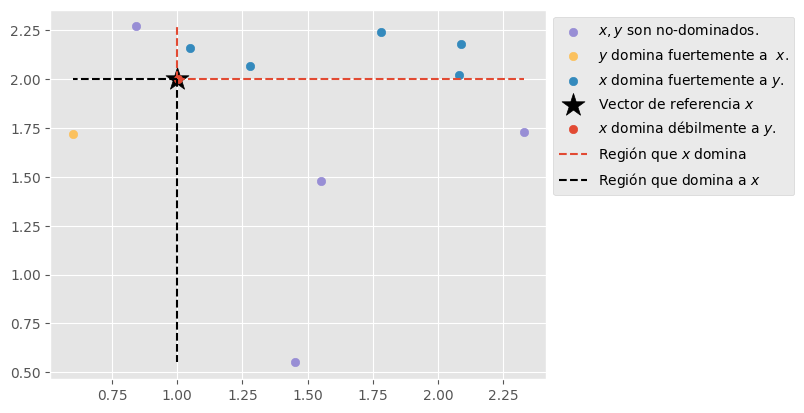

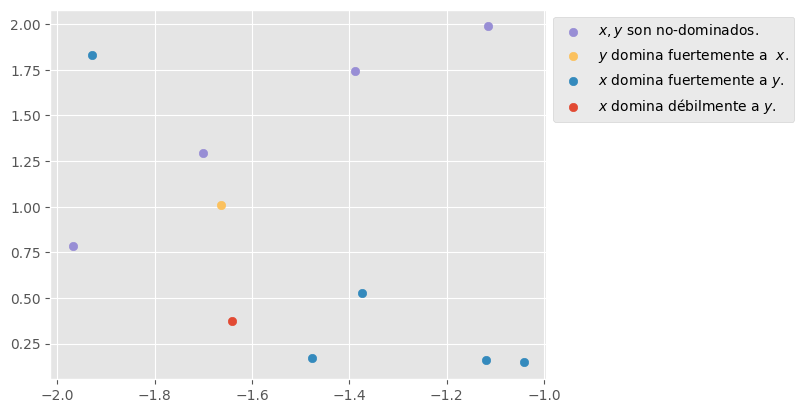

In [ ]:
import numpy as np

dicc_dominancia = {0:'$x$ domina débilmente a $y$.', 1: '$x$ domina fuertemente a $y$.',2: '$x,y$ son no-dominados.',
                   3: '$x$ domina a $y$', 4:'$y$ domina fuertemente a  $x$.', 5: '$y$ dominates $x$'}

def vector_dominance(v1, v2):
    """
    Determines the dominance relationship between two vectors.

    Args:
    v1 (np.array): First vector.
    v2 (np.array): Second vector.

    Returns:
    int: Numeric value that represents the dominance relationship via dicc_dominanciea
    """
    better_indices = np.where(v1 < v2)[0]
    worse_indices = np.where(v1 > v2)[0]
    equal_indices = np.where(v1 == v2)[0]


    if len(equal_indices) == len(v1):
        print('Vector v1 weakly dominates v2.')
        return 0

    if len(better_indices) >0:
        if len(better_indices) == len(v1):
            print('Vector v1 strongly dominates v2')
            return 1

        if len(worse_indices)>0:
            print(f"Vectors are non dominated. ; v1 is better in dimensions {better_indices + 1} and worse in dimensions {worse_indices + 1}.")
            return 2

        if len(better_indices)< len(v1):
            print(f"Vector v1 dominates v2 in dimensions {better_indices + 1}.")
            return 3

    if len(worse_indices) >0:
        if len(worse_indices) == len(v1):
            print(f"Vector v2 strongly dominates v1.")
            return 4

        if len(worse_indices)< len(v1):
            # Ya se excluy el caso de dno dominancia porque se hubiera regresado arriba
            print(f"Vector v2 dominates v1 in dimensions {worse_indices + 1}.")
            return 5



    raise ValueError("Unexpected condition. Please check the input vectors.")





# vector con el que se comparan
v1 = np.array([1, 2])
import seaborn as sns

cp = sns.color_palette()
vectores = np.random.uniform(low=0,high=3, size=(10, 2)).round(2)

from collections import defaultdict

dominance_dict = defaultdict(int)
dominance_list = []
for vi in vectores:
    dominance = vector_dominance(v1, vi)
    dominance_list.append(dominance)

    print(v1, vi, dicc_dominancia[dominance])
    dominance_dict[dominance]+=1

    if dominance_dict[dominance] == 1:
        plt.scatter(vi[0], vi[1],color=cp[dominance],label=dicc_dominancia[dominance]);
    else:
        plt.scatter(vi[0], vi[1],color=cp[dominance]);

v1_copy = v1.copy()
dominance = vector_dominance(v1, v1_copy)
dominance_list.append(dominance)

print(v1, v1_copy, dicc_dominancia[dominance])
dominance_dict[dominance]+=1

plt.scatter(v1[0], v1[1],  marker='*',s=300,color='k',label='Vector de referencia $x$')
plt.vlines(x=v1[0],ymin=v1[1],ymax=np.max(vectores[:,1]),linestyles='dashed')
plt.scatter(x=v1_copy[0]+0.001, y=v1_copy[1],color=cp[0],label=dicc_dominancia[0]);
plt.hlines(y=v1[1],xmin=v1[0],xmax=np.max(vectores[:,0]),linestyles='dashed',label='Región que $x$ domina')
plt.vlines(x=v1[0],ymin=v1[1],ymax=np.min(vectores[:,1]),linestyles='dashed',colors='k')
plt.hlines(y=v1[1],xmin=v1[0],xmax=np.min(vectores[:,0]),linestyles='dashed',colors='k',label='Región que domina a $x$')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));
plt.show()
dominance_dict = defaultdict(int)

for dominance in dominance_list:
    x_rand_decision = np.random.uniform(low=-1, high=-2)
    y_rand_decision = np.random.uniform(low=0, high=2)

    dominance_dict[dominance]+=1

    if dominance_dict[dominance] == 1:
        plt.scatter(x_rand_decision, y_rand_decision,color=cp[dominance],label=dicc_dominancia[dominance]);
    else:
        plt.scatter(x_rand_decision, y_rand_decision,color=cp[dominance]);
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));
plt.show()

## Dominancia entre conjuntos

In [20]:
# Para ilustrar que la dominancia no es la única característica deseable

from pymoo.problems import get_problem

problem = get_problem("WFG1",n_var=24,n_obj=2)
pf = problem.pareto_front()

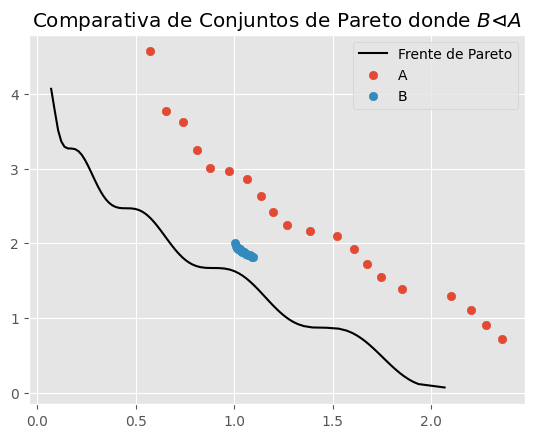

In [45]:
plt.title('Comparativa de Conjuntos de Pareto donde $B\\vartriangleleft A$')
plt.plot(pf[:,0],pf[:,1],label='Frente de Pareto',c='k')
aprox_1 = pf+0.5
aprox_1 = aprox_1[::5]
plt.scatter(aprox_1[:,0],aprox_1[:,1],label='A')
aprox_2 = (pf)*0.05+ np.array([1, 1.8])

aprox_2 = aprox_2[::5]
plt.scatter(aprox_2[:,0],aprox_2[:,1],label='B')
plt.legend()

In [51]:
def compute_distance_matrix(points, theta=10):
    """Compute the matrix M for the SPI based on distances."""
    n = len(points)
    M = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            M[i, j] = np.exp(-theta * np.linalg.norm(points[i] - points[j]))
    return M

def solow_polasky_indicator(points, theta=10):
    """Compute the Solow Polasky Indicator."""
    M = compute_distance_matrix(points, theta)
    C = np.linalg.inv(M)
    return np.sum(C)

solow_polasky_indicator(aprox_1),solow_polasky_indicator(aprox_2)

(15.397483452727606, 2.0690658919869973)

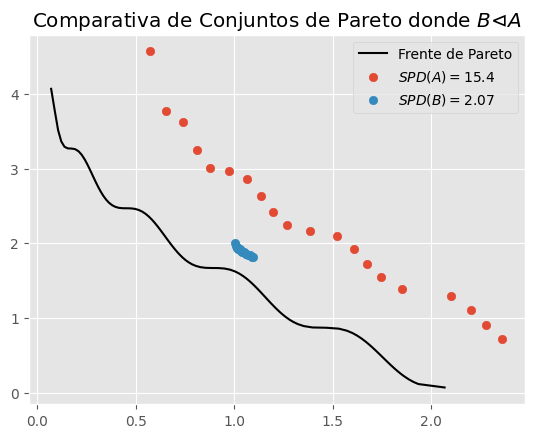

In [58]:
plt.title('Comparativa de Conjuntos de Pareto donde $B\\vartriangleleft A$')
plt.plot(pf[:,0],pf[:,1],label='Frente de Pareto',c='k')
aprox_1 = pf+0.5
aprox_1 = aprox_1[::5]
plt.scatter(aprox_1[:,0],aprox_1[:,1],label=f'$SPD(A)={round(solow_polasky_indicator(aprox_1),2)}$')

aprox_2 = (pf)*0.05+ np.array([1, 1.8])
aprox_2 = aprox_2[::5]
plt.scatter(aprox_2[:,0],aprox_2[:,1],label=f'$SPD(B)={round(solow_polasky_indicator(aprox_2),2)}$')
plt.legend()

# Algoritmo genético

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class EvolutionaryAlgorithm:
    def __init__(self, population_size, bounds, mutation_rate, mutation_scale, population=None):
        self.population_size = population_size
        self.bounds = bounds
        self.mutation_rate = mutation_rate
        self.mutation_scale = mutation_scale
        if population is None:
            self.population = self.initialize_population()
        else:
            self.population = population
        self.fitness = self.evaluate_fitness()
        self.history = [(self.population.copy(), self.fitness.copy())]

    def initialize_population(self):
        """Initialize the population randomly within given bounds."""
        return np.random.uniform(low=self.bounds[0], high=self.bounds[1], size=self.population_size)

    def evaluate_fitness(self):
        """Calculate fitness for each individual in the population."""
        x=self.population
        return -((x-0.5)**2*(1+np.sin(30 * np.pi * x))+np.abs(0.05*(x-0.5)))

    def select_parents(self):
        """Select parents using roulette wheel selection."""
        fitness_positive = self.fitness - self.fitness.min()  # Make fitness non-negative
        probabilities = fitness_positive / fitness_positive.sum()
        indices = np.random.choice(self.population_size, size=self.population_size, p=probabilities)
        return self.population[indices]

    def crossover(self, parent1, parent2):
        """Perform a simple arithmetic crossover."""
        alpha = np.random.rand()
        return alpha * parent1 + (1 - alpha) * parent2

    def mutate(self, individual):
        """Mutate an individual by adding a normal noise."""
        if np.random.rand() < self.mutation_rate:
            individual += np.random.normal(loc=0, scale=self.mutation_scale)
        return np.clip(individual, self.bounds[0], self.bounds[1])  # Ensure the bounds are respected

    def create_generation(self, parents):
        """Create a new generation using crossover and mutation."""
        new_population = []
        for _ in range(self.population_size // 2):  # Assume population_size is even
            parent1, parent2 = np.random.choice(parents, 2, replace=False)
            child1 = self.crossover(parent1, parent2)
            child2 = self.crossover(parent1, parent2)
            new_population.append(self.mutate(child1))
            new_population.append(self.mutate(child2))
        return np.array(new_population)

    def step(self):
        """Perform one step of the evolutionary process."""
        parents = self.select_parents()
        self.population = self.create_generation(parents)
        self.fitness = self.evaluate_fitness()
        self.history.append((self.population.copy(), self.fitness.copy()))

    def run(self, generations):
        """Run the evolutionary algorithm for a number of generations."""
        for _ in range(generations):
            self.step()

    def plot_evolution(self):
        """Plot the evolution of the algorithm."""
        plt.figure()
        for i, (pop, fit) in enumerate(self.history):
            plt.scatter(pop, fit, label=f'Generation {i}')
        plt.legend()
        plt.title('Evolutionary Progress')
        plt.xlabel('Phenotype')
        plt.ylabel('Fitness')
        plt.show()



# Initialize and run the evolutionary algorithm

# ea.plot_evolution()


(100,)

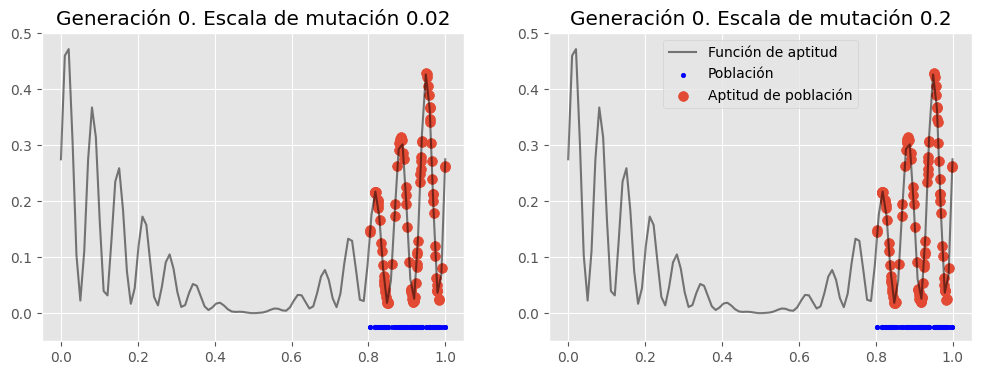

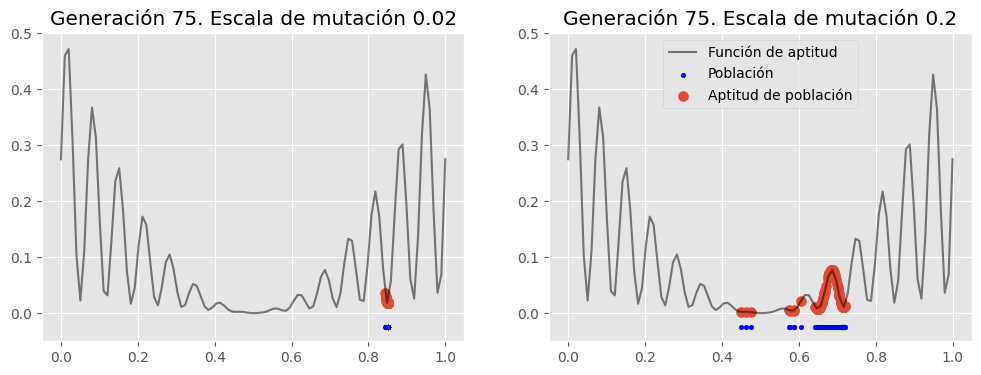

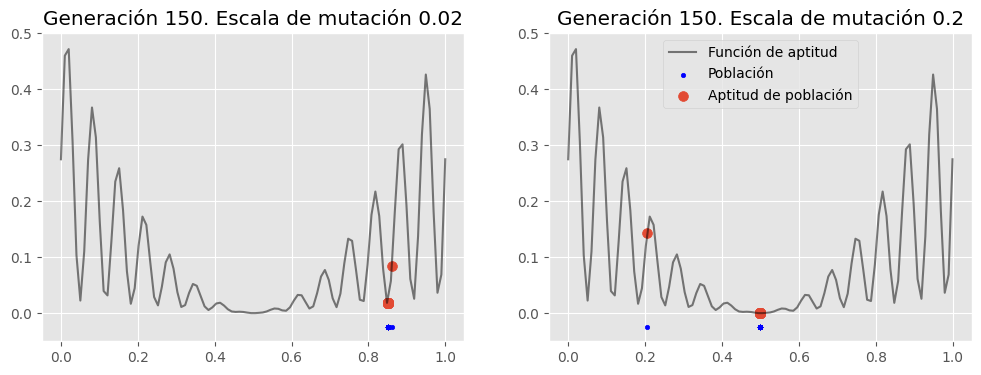

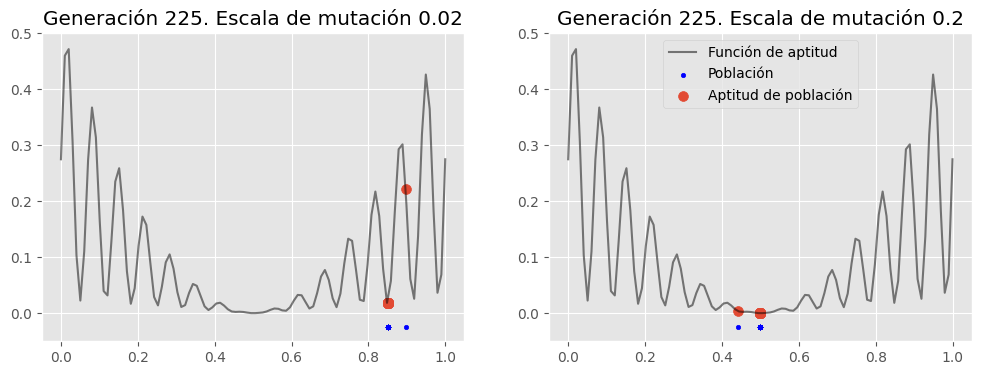

In [ ]:
plt.style.use('ggplot')

# Parameters
population_size = 100
generations = 10
mutation_rate = 0.01
mutation_scale = 0.02
bounds = (0, 1)

population_init = np.random.uniform(low=0.8, high=1, size=100)
ea_crowded = EvolutionaryAlgorithm(population_size, bounds, mutation_rate, mutation_scale,population=population_init)
ea_sparse = EvolutionaryAlgorithm(population_size, bounds, mutation_rate=0.01, mutation_scale=0.2,population=population_init)
paso = 75
for i in range(4):
  fig, ax = plt.subplots(1, 2, figsize=(12, 4))
  pop=ea_crowded.population
  x=np.linspace(0,1,num=100)
  ax[0].plot(x, (x-0.5)**2*(1+np.sin(30 * np.pi * x))+np.abs(0.05*(x-0.5)),c='k',label='Función de aptitud',alpha=0.5)
  ax[0].scatter(y=np.zeros(len(pop))-0.025,x=pop,s=10,c='b',label='Población')
  ax[0].scatter(y=(pop-0.5)**2*(1+np.sin(30 * np.pi * pop))+np.abs(0.05*(pop-0.5)),x=pop,s=50,label='Aptitud de población')
  ax[0].set_ylim([-0.05, 0.5])
  ax[0].set_title(f'Generación {paso*i}. Escala de mutación 0.02')
  ea_crowded.run(paso)

  pop=ea_sparse.population
  x=np.linspace(0,1,num=100)
  ax[1].plot(x, (x-0.5)**2*(1+np.sin(30 * np.pi * x))+np.abs(0.05*(x-0.5)),c='k',label='Función de aptitud',alpha=0.5)
  ax[1].scatter(y=np.zeros(len(pop))-0.025,x=pop,s=10,c='b',label='Población')
  ax[1].scatter(y=(pop-0.5)**2*(1+np.sin(30 * np.pi * pop))+np.abs(0.05*(pop-0.5)),x=pop,s=50,label='Aptitud de población')
  ax[1].set_ylim([-0.05, 0.5])
  ax[1].set_title(f'Generación {paso*i}. Escala de mutación 0.2')
  plt.legend()
  plt.show()
  ea_sparse.run(paso)

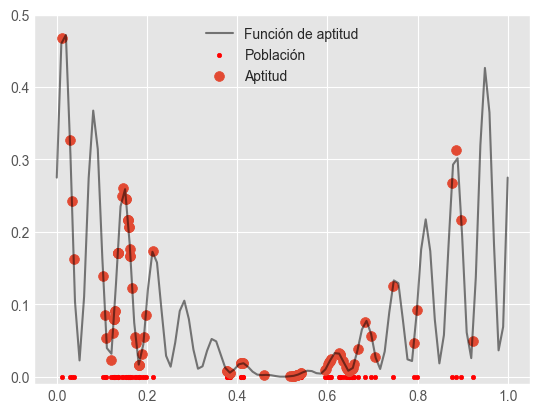

In [ ]:
ea.run(generations)
pop = np.zeros(shape=(ea.population.shape[0]))
for i,row in enumerate(ea.population):
    pop[i] = ea.binary_to_real(row)

x=np.linspace(0,1,num=100)
plt.plot(x, (x-0.5)**2*(1+np.sin(30 * np.pi * x))+np.abs(0.05*(x-0.5)),c='k',label='Función de aptitud',alpha=0.5)
plt.scatter(y=np.zeros(len(pop)),x=pop,s=10,c='r',label='Población')
plt.scatter(y=(pop-0.5)**2*(1+np.sin(30 * np.pi * pop))+np.abs(0.05*(pop-0.5)),x=pop,s=50,label='Aptitud')
plt.ylim([-0.01, 0.5])
plt.legend()


Scenario 1: Both ANOVA and Friedman fail to reject H0
Repeated Measures ANOVA:
                   sum_sq    df         F    PR(>F)
C(treatment)    73.171375   2.0  0.256134  0.774909
C(subject)    3482.528266  29.0  0.840722  0.689664
Residual      8284.610559  58.0       NaN       NaN

Friedman Test: chi2=0.800, p-value=0.670


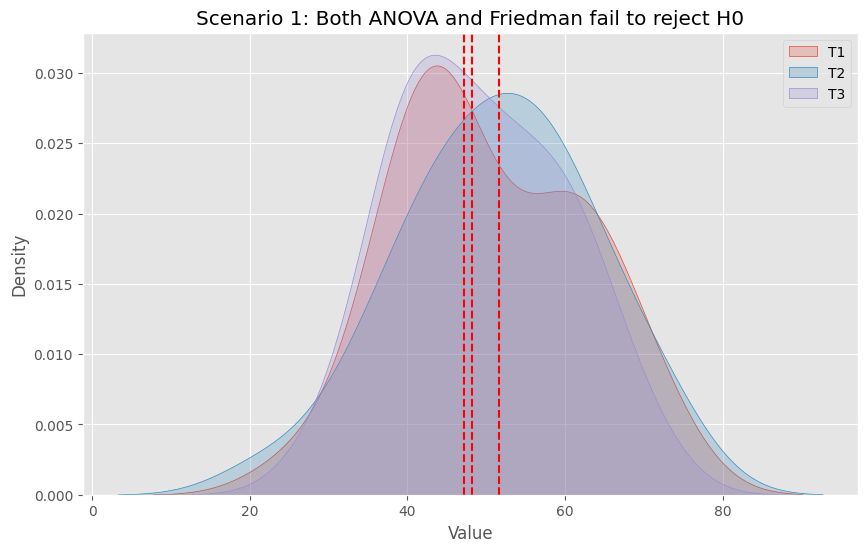


Scenario 2: ANOVA fails to reject H0 but Friedman rejects
Repeated Measures ANOVA:
                    sum_sq    df         F    PR(>F)
C(treatment)     43.335188   2.0  0.043112  0.957835
C(subject)    16925.434821  29.0  1.161265  0.307987
Residual      29150.007971  58.0       NaN       NaN

Friedman Test: chi2=0.200, p-value=0.905


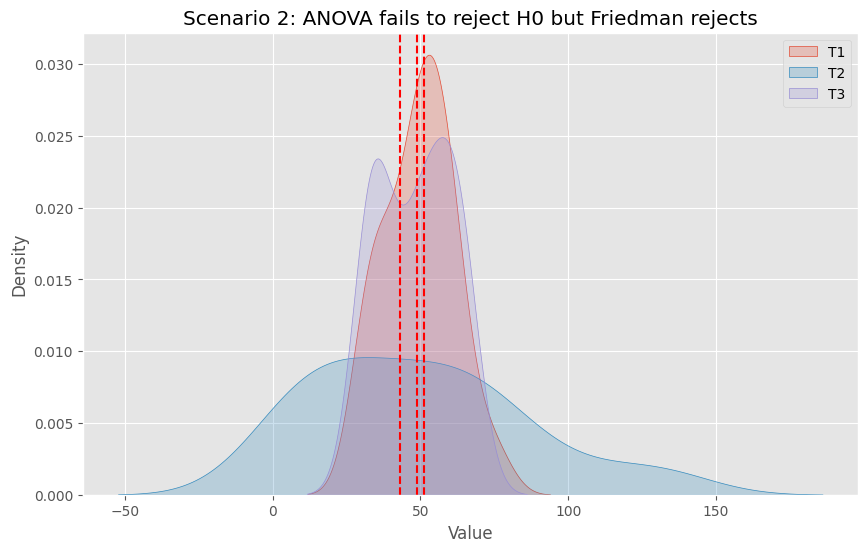


Scenario 3: ANOVA rejects H0 but Friedman does not
Repeated Measures ANOVA:
                   sum_sq    df          F        PR(>F)
C(treatment)  7684.049736   2.0  43.515573  2.864407e-12
C(subject)    2861.603809  29.0   1.117625  3.513863e-01
Residual      5120.866540  58.0        NaN           NaN

Friedman Test: chi2=41.867, p-value=0.000


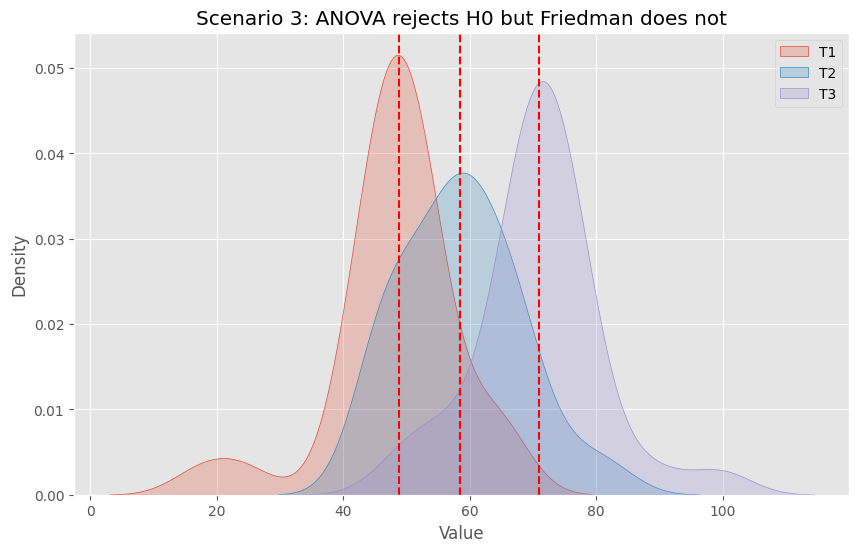


Scenario 4: Both ANOVA and Friedman reject H0
Repeated Measures ANOVA:
                    sum_sq    df           F        PR(>F)
C(treatment)  26757.660772   2.0  135.527178  1.376100e-22
C(subject)     1581.365809  29.0    0.552386  9.581454e-01
Residual       5725.583411  58.0         NaN           NaN

Friedman Test: chi2=50.467, p-value=0.000


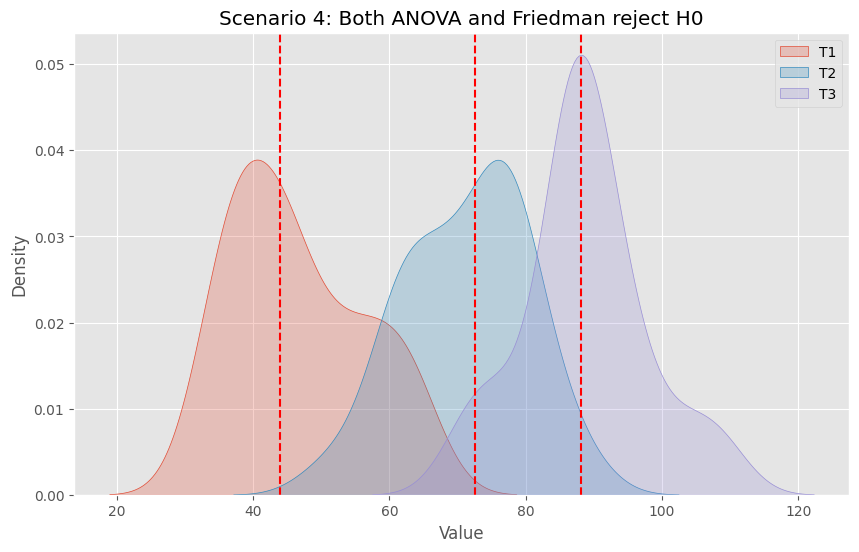

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import friedmanchisquare
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Set random seed for reproducibility
np.random.seed(123)

# Number of subjects
n_subjects = 30

# Generate data for each scenario
data_scenario1 = {
    'subject': np.tile(np.arange(1, n_subjects + 1), 3),
    'treatment': np.repeat(['T1', 'T2', 'T3'], n_subjects),
    'value': np.concatenate([
        np.random.normal(50, 10, n_subjects),
        np.random.normal(50, 10, n_subjects),
        np.random.normal(50, 10, n_subjects)
    ])
}

data_scenario2 = {
    'subject': np.tile(np.arange(1, n_subjects + 1), 3),
    'treatment': np.repeat(['T1', 'T2', 'T3'], n_subjects),
    'value': np.concatenate([
        np.random.normal(50, 10, n_subjects),
        np.random.exponential(50, n_subjects),
        np.random.uniform(30, 70, n_subjects)
    ])
}

data_scenario3 = {
    'subject': np.tile(np.arange(1, n_subjects + 1), 3),
    'treatment': np.repeat(['T1', 'T2', 'T3'], n_subjects),
    'value': np.concatenate([
        np.random.normal(50, 10, n_subjects),
        np.random.normal(60, 10, n_subjects),
        np.random.normal(70, 10, n_subjects)
    ])
}

data_scenario4 = {
    'subject': np.tile(np.arange(1, n_subjects + 1), 3),
    'treatment': np.repeat(['T1', 'T2', 'T3'], n_subjects),
    'value': np.concatenate([
        np.random.normal(50, 10, n_subjects),
        np.random.normal(70, 10, n_subjects),
        np.random.normal(90, 10, n_subjects)
    ])
}

# Convert to dataframes
df_scenario1 = pd.DataFrame(data_scenario1)
df_scenario2 = pd.DataFrame(data_scenario2)
df_scenario3 = pd.DataFrame(data_scenario3)
df_scenario4 = pd.DataFrame(data_scenario4)

# Function to run repeated measures ANOVA
def repeated_measures_anova(df):
    model = ols('value ~ C(treatment) + C(subject)', data=df).fit()
    aov_table = sm.stats.anova_lm(model, typ=2)
    return aov_table

# Function to run Friedman test
def run_friedman_test(df):
    df_wide = df.pivot(index='subject', columns='treatment', values='value')
    stat, p = friedmanchisquare(df_wide['T1'], df_wide['T2'], df_wide['T3'])
    return stat, p

# Function to plot distributions
def plot_distributions(df, scenario_title):
    plt.figure(figsize=(10, 6))
    for treatment in df['treatment'].unique():
        sns.kdeplot(df[df['treatment'] == treatment]['value'], fill=True, label=treatment)
        plt.axvline(df[df['treatment'] == treatment]['value'].median(), color='r', linestyle='--')
    plt.title(scenario_title)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Run tests and plot for each scenario
for i, (df, title) in enumerate(zip(
    [df_scenario1, df_scenario2, df_scenario3, df_scenario4],
    ['Scenario 1: Both ANOVA and Friedman fail to reject H0',
     'Scenario 2: ANOVA fails to reject H0 but Friedman rejects',
     'Scenario 3: ANOVA rejects H0 but Friedman does not',
     'Scenario 4: Both ANOVA and Friedman reject H0']
)):
    print(f"\n{title}")
    print("Repeated Measures ANOVA:")
    print(repeated_measures_anova(df))
    stat, p = run_friedman_test(df)
    print(f"\nFriedman Test: chi2={stat:.3f}, p-value={p:.3f}")
    plot_distributions(df, title)


Figura de espacio de decisiones a espacio de objetivos

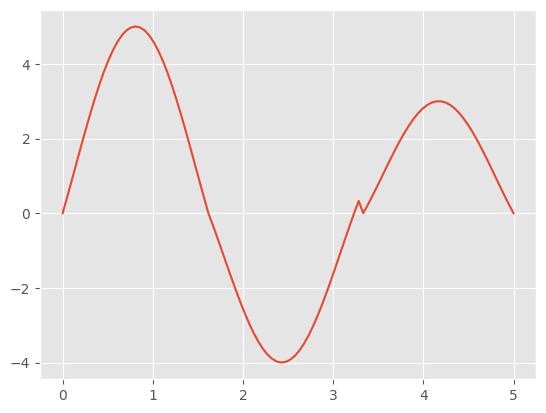

In [ ]:
x=np.linspace(0,5,100)

def parabola_max_enmedio(x,crest):
    x_enm=x[len(x)//2]
    return -(x-x_enm)**2+crest


def seno_osc(x,osc=2):
    return np.sin(x/(x[-1]-x[0])*np.pi*osc)

def max_loc(x,tam_izq=1/3,tam_enmedio=1/3):
    tam_der=1-tam_izq-tam_enmedio
    # Función con máximo global del lado izq
    lim_izq,lim_enm=int(len(x)*tam_izq), int(len(x)*(tam_izq+tam_enmedio))
    x_izq,x_enm,x_der=x[:lim_izq],x[lim_izq:lim_enm],x[lim_enm:]

    f_izq=seno_osc(x_izq,1)*parabola_max_enmedio(x_izq,5)
    f_enm=seno_osc(x_enm,1)*parabola_max_enmedio(x_enm,4)
    f_der=seno_osc(x_der,1)*parabola_max_enmedio(x_der,3)

    return np.r_[f_izq,f_enm,f_der]

plt.plot(x,max_loc(x))

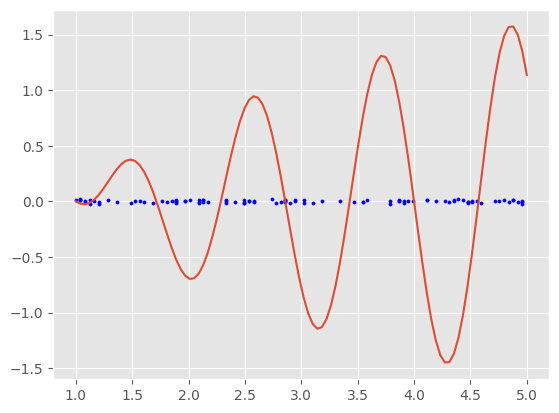

In [ ]:
x=np.linspace(1,5,100)
n_osc=3.5
func_osc=lambda x: np.sin(n_osc*2*np.pi*x/(x[-1]-x[0]))*np.log(x)

plt.plot(x,func_osc(x))
x_random=np.random.choice(a=x,size=100)
plt.scatter(x_random,np.random.normal(0,0.01,size=len(x_random)),label='puntos generados',s=5,c='blue')


La función está dada por

$$ f(x)=\sin\left(n_{osc}*{2\pi}\frac{x}{L}\right) \log(x) $$

su derivada está dada por
$$ f'(x)=-n_{osc}{2\pi}\frac{1}{L}\cos\left(n_{osc}{2\pi}\frac{x}{L}\right)\log(x)+\sin\left(n_{osc}{2\pi}\frac{x}{L}\right)\frac{1}{x} $$

FileNotFoundError: [Errno 2] No such file or directory: '../Tesis_Latex_LCD/Capitulo2/img/explotacion.pdf'

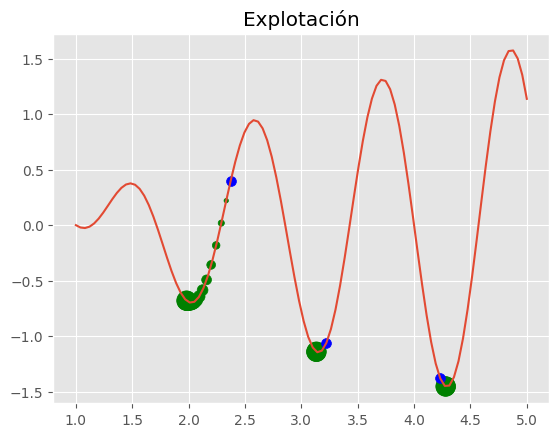

In [ ]:
L=x[-1]-x[0]

def grad(x,L=L,n_osc=n_osc):
    return -n_osc*2*np.pi/L*np.cos(n_osc*2*np.pi*x/L)*np.log(x)+np.sin(n_osc*2*np.pi*x/L)/x

grad(x[0],L,n_osc=3.5)

def loop_gradiente_desc(x,grad,α=0.01,N_iter=20):
    tray_x=[x]
    for i in range(N_iter):
        x+=α*grad(x)
        tray_x.append(x)

    return np.array(tray_x)

x=np.linspace(1,5,100)
n_osc=3.5
func_osc=lambda x: np.sin(n_osc*2*np.pi*x/L)*np.log(x)
plt.plot(x,func_osc(x))
x_random=np.random.choice(a=x,size=3)

for i,xir in enumerate(x_random):

    path_gd=loop_gradiente_desc(xir,grad=grad)
    if i==0:
        plt.scatter(path_gd,func_osc(path_gd),color='g',label='gradiente descendiente',s=np.arange(len(path_gd))*10)

    else:
        plt.scatter(path_gd,func_osc(path_gd),color='g',s=np.arange(len(path_gd))*10)

plt.title('Explotación')
plt.scatter(x_random,func_osc(x_random),label='punto inicial',s=50,c='blue')
plt.savefig('./Figuras/explotacion.pdf')
plt.legend()
plt.show()

In [ ]:
L=x[-1]-x[0]

def grad(x,L=L,n_osc=n_osc):
    return -n_osc*2*np.pi/L*np.cos(n_osc*2*np.pi*x/L)*np.log(x)+np.sin(n_osc*2*np.pi*x/L)/x

grad(x[0],L,n_osc=3.5)

def loop_gradiente_desc(x,grad,α=0.01,N_iter=10):
    tray_x=[x]
    for i in range(N_iter):
        x+=α*grad(x)
        tray_x.append(x)

    return np.array(tray_x)

x=np.linspace(1,5,100)
n_osc=3.5
func_osc=lambda x: np.sin(n_osc*2*np.pi*x/L)*np.log(x)
plt.plot(x,func_osc(x))
x_random=np.random.choice(a=x,size=5)

for i,xir in enumerate(x_random):

    path_gd=loop_gradiente_desc(xir,grad=grad)
    if i==0:
        plt.scatter(path_gd,func_osc(path_gd),color='g',label='gradiente descendiente',s=np.arange(len(path_gd))*10)

    else:
        plt.scatter(path_gd,func_osc(path_gd),color='g',s=np.arange(len(path_gd))*10)

plt.title('Exploración')
plt.scatter(x_random,func_osc(x_random),label='punto inicial',s=50,c='blue')
plt.legend()
plt.savefig('../Tesis_Latex_LCD/Capitulo2/img/exploracion.pdf')

plt.show()

# NSGA -II WFG1

In [63]:
# %%capture
# !pip install pymoo

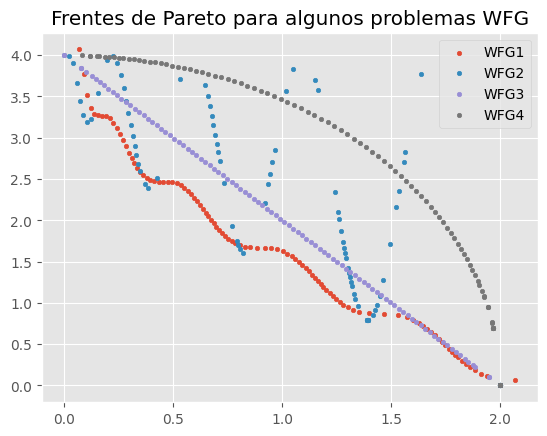

In [ ]:

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.title('Frentes de Pareto para algunos problemas WFG')
for i in range(1,5):
  problem = get_problem(f"WFG{i}",n_var=24,n_obj=2)
  pf = problem.pareto_front()

  plt.scatter(pf[:,0],pf[:,1],label=f'WFG{i}',s=10)
plt.legend()
plt.show()

In [50]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem

problem = get_problem("WFG1",n_var=24,n_obj=2)
pf = problem.pareto_front()
algorithm = NSGA2(pop_size=100,seed=1)
algorithm.setup(problem, termination=('n_gen', 3_001), seed=1, verbose=False)


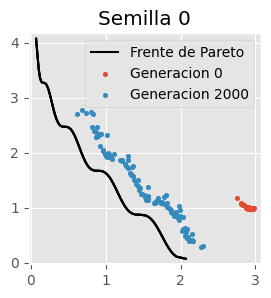

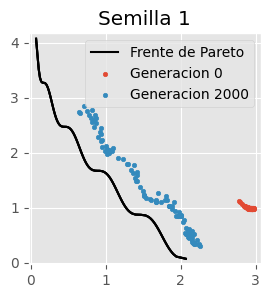

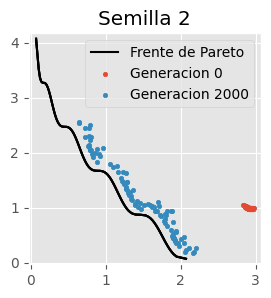

In [57]:


for j in range(3):
  algorithm = NSGA2(pop_size=100)
# prepare the algorithm to solve the specific problem (same arguments as for the minimize function)
  algorithm.setup(problem, termination=('n_gen', 2_001), seed=j, verbose=False)

  pf = problem.pareto_front()

  # until the algorithm has no terminated
  i = 0
  pop = algorithm.ask()
  # evaluate the individuals using the algorithm's evaluator (necessary to count evaluations for termination)
  algorithm.evaluator.eval(problem, pop)
  population = pop.get("F")
  min_x = min(population[:, 0].min(),pf[:,0].min())-0.1
  max_x = max(population[:, 0].max(),pf[:,0].max())+0.1
  min_y = min(population[:, 1].min(),pf[:,1].min())-0.1
  max_y = max(population[:, 1].max(),pf[:,1].max())+0.1

  lista_poblaciones = {}

  while algorithm.has_next():
    
    if i==0:
      plt.figure(figsize=(3,3))
      plt.plot(pf[:,0],pf[:,1],color='k',label='Frente de Pareto')

    if i%2_000==0:
      population = pop.get("F")
      lista_poblaciones[i] = population
      plt.title(f'Semilla {j}')
      plt.plot(pf[:,0],pf[:,1],color='k')
      plt.xlim([min_x,max_x])
      plt.ylim([min_y,max_y])
      plt.scatter(population[:, 0], population[:, 1], s=10,label=f'Generacion {i}')
      # plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    # returned the evaluated individuals which have been evaluated or even modified
    algorithm.tell(infills=pop)
    # ask the algorithm for the next solution to be evaluated
    pop = algorithm.ask()

    # evaluate the individuals using the algorithm's evaluator (necessary to count evaluations for termination)
    algorithm.evaluator.eval(problem, pop)
    i+=1

  plt.legend()
  plt.show()


# $\epsilon +$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generar dos conjuntos de soluciones en R2
np.random.seed(0)  # para reproducibilidad
set_A = np.random.uniform(0, 5, (10, 2))  # 10 puntos aleatorios en 2D
set_B = np.random.uniform(1, 6, (10, 2))  # otros 10 puntos aleatorios en 2D

# Función para calcular epsilon+
def epsilon_plus(A, B):
    epsilon_values = []
    for b in B:
        min_improvements = [max(b[i] - a[i] for a in A) for i in range(2)]
        epsilon_values.append(min(min_improvements))

    max_epsilon = max(epsilon_values)
    return max_epsilon, epsilon_values

# Calcular epsilon+
epsilon_value, individual_epsilon_values = epsilon_plus(set_A, set_B)

# Identificar los puntos que contribuyen al valor de epsilon+
max_epsilon_index = np.argmax(individual_epsilon_values)
b_max = set_B[max_epsilon_index]
a_min = set_A[np.argmin([max(b_max[i] - a[i] for i in range(2)) for a in set_A])]

# Objetivo que maximiza la diferencia
objective_max_diff = np.argmax([b_max[i] - a_min[i] for i in range(2)])

# Trazado
plt.figure(figsize=(10, 6))
plt.scatter(set_A[:, 0], set_A[:, 1], color='blue', label='Conjunto A')
plt.scatter(set_B[:, 0], set_B[:, 1], color='red', label='Conjunto B')
plt.scatter(a_min[0], a_min[1], color='green', label='Mín A', s=100, edgecolors='k')
plt.scatter(b_max[0], b_max[1], color='orange', label='Máx B', s=100, edgecolors='k')
plt.arrow(a_min[0], a_min[1], b_max[0] - a_min[0], b_max[1] - a_min[1],
          head_width=0.2, head_length=0.2, fc='purple', ec='purple')
plt.xlabel('Objetivo 1')
plt.ylabel('Objetivo 2')
plt.title(f'Ilustración del Indicador Epsilon+ (Valor de Epsilon+: {epsilon_value:.2f})')
plt.legend()
plt.grid(True)
plt.show()

# Devolver el valor de epsilon+, los puntos y el objetivo maximizado
epsilon_value, a_min, b_max, objective_max_diff


In [ ]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(set_A[:, 0], set_A[:, 1], color='blue', label='A')
plt.scatter(set_B[:, 0], set_B[:, 1], color='red', label='B')
plt.scatter(a_min[0], a_min[1], color='green', label='$\min_{a\in A}$', s=100, edgecolors='k')
plt.scatter(b_max[0], b_max[1], color='orange', label='$\max_{b\in B}$', s=100, edgecolors='k')
plt.xlabel('$f_0$')
plt.xlim(0,10)
plt.ylim(0,10)
plt.ylabel('$f_1$')
plt.title('Antes de desplazar')
plt.legend()
plt.grid(True)

# después de desplazar
set_A_displaced = set_A + epsilon_value
plt.subplot(1, 2, 2)
plt.scatter(set_A_displaced[:, 0], set_A_displaced[:, 1], color='blue', label='A (Desplazado)')
plt.scatter(set_B[:, 0], set_B[:, 1], color='red', label='B')
plt.xlabel('$f_0$')
plt.ylabel('$f_1$')
plt.xlim(0,10)
plt.ylim(0,10)
plt.title('Después de desplazar por $epsilon_+$')
plt.legend()
plt.grid(True)

# plt.tight_layout()
plt.savefig('../Tesis_Latex_LCD/Capitulo3/img/epsp.pdf')
plt.show()


# Non dominated sorting

In [9]:
import seaborn as sns

def dominates(row, candidateRow):
    return all(r <= c for r, c in zip(row, candidateRow)) and any(r < c for r, c in zip(row, candidateRow))

def non_dominated_sort(points):
    fronts = []
    dominated = {}
    dominate_counts = np.zeros(len(points))

    for i, p1 in enumerate(points):
        dominated[i] = set()
        for j, p2 in enumerate(points):
            if dominates(p1, p2):
                dominated[i].add(j)
            elif dominates(p2, p1):
                dominate_counts[i] += 1

        if dominate_counts[i] == 0:
            if not fronts:
                fronts.append(set())
            fronts[0].add(i)

    i = 0
    while fronts[i]:
        next_front = set()
        for j in fronts[i]:
            for k in dominated[j]:
                dominate_counts[k] -= 1
                if dominate_counts[k] == 0:
                    next_front.add(k)
        i += 1
        fronts.append(next_front)

    return fronts[:-1]



colors=sns.color_palette(n_colors=100)

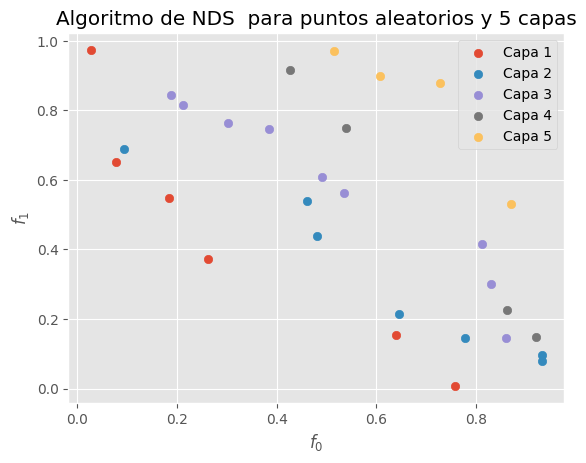

In [19]:
# Example usage
n_fronts=np.inf
while n_fronts>5:
    points = np.random.rand(30, 2)  # Generate some random 2D points
    fronts = non_dominated_sort(points)
    n_fronts=len(fronts)


for i,front in enumerate(fronts):
    x_front=np.zeros(shape=(len(front),2))
    front_idx=np.array([f for f in front])

    x_front=points[front_idx,:]

    plt.scatter(x_front[:,0],x_front[:,1],color=colors[i],label=f'Capa {i+1}')
    # plt.plot(x_front[:,0],x_front[:,1],color=colors[i])

plt.title('Algoritmo de NDS  para puntos aleatorios y 5 capas')
plt.legend()
plt.xlabel('$f_0$')
plt.ylabel('$f_1$')
# Rehacer este con plotly para que se pueda ir quitando quien domina a quién
plt.savefig('./Figuras/nds.pdf')
plt.show()

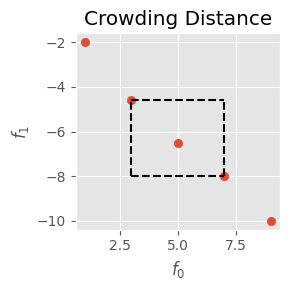

In [8]:
# plot crowding distance 
import matplotlib.pyplot as plt
import numpy as np

puntos = np.array([[1, -2], [3, -4.6], [5, -6.5], [7, -8], [9, -10]])
# for i in 

plt.figure(figsize=(3, 3))
plt.title('Crowding Distance')
plt.scatter(puntos[:, 0], puntos[:, 1])
I_0 = np.argsort(puntos[:, 0])
I_1 = np.argsort(puntos[:, 1])
I_0,I_1
indice = 2 
puntos_cercanos_x = puntos[I_0[indice-1:indice+2:2], 0]
puntos_cercanos_y = puntos[I_1[indice-1:indice+2:2], 1]
distancia_x = np.abs(puntos_cercanos_x[0] - puntos_cercanos_x[1])
distancia_y = np.abs(puntos_cercanos_y[0] - puntos_cercanos_y[1])
distancia_x,distancia_y
plt.hlines(y=[-4.6],xmin=3,xmax=7,colors='k',linestyles='dashed')
plt.hlines(y=[-8],xmin=3,xmax=7,colors='k',linestyles='dashed')
plt.vlines(x=[3],ymin=-8,ymax=-4.6,colors='k',linestyles='dashed')
plt.vlines(x=[7],ymin=-8,ymax=-4.6,colors='k',linestyles='dashed')
plt.xlabel('$f_0$')
plt.ylabel('$f_1$')
plt.tight_layout()
plt.savefig('./Figuras/crowding_distance.pdf', format='pdf', bbox_inches='tight');

# Kruskal-Wallis

In [ ]:
import scipy.stats as stats

alpha=0.05

# Escenario 1: H0 Aceptadas (distribuciones similar y medias)
pop1_s1 = np.random.normal(50, 10, 100)
pop2_s1 = np.random.normal(51, 10, 100)
pop3_s1 = np.random.normal(52, 10, 100)

# Escenario 2: H0 de ANOVA se acepta, H0 from Kruskal-Wallis Rejected (similar means, different distributions)
pop1_s2 = np.random.normal(50, 10, 100)
pop2_s2 = np.random.normal(50, 20, 100)
pop3_s2 = np.random.exponential(1, 100) * 50

# Escenario 3: H0 de kruskal se acepta, h0 de ANOVA se rechaza (medias y varianzas diferentes, pero distribuciones similares)

common_median = 10

pop1_s3 = np.random.normal(common_median, 1, 1000)

# 2. Distribución Exponencial (Desplazada para tener la misma mediana)
# Dado que la mediana de una distribución exponencial es log(2)*escala, resolvemos para escala
exponential_scale = common_median / np.log(2)
pop2_s3 = np.random.exponential(exponential_scale, 1000)

# 3. Distribución Bimodal (Dos medias diferentes, pero ajustadas para tener la misma mediana)

pop3_s3 = np.concatenate([np.random.normal(common_median - 5, 1, 500),
                               np.random.normal(common_median + 5, 1, 500)])


# Escenario 4: Ambos H0 Rechazados (diferencias claras en medias/distribuciones)
pop1_s4 = np.random.normal(50, 10, 100)
pop2_s4 = np.random.normal(70, 10, 100)
pop3_s4 = np.random.normal(90, 10, 100)

# Pruebas
results = {}
for i, (pop1, pop2, pop3) in enumerate([(pop1_s1, pop2_s1, pop3_s1), (pop1_s2, pop2_s2, pop3_s2),
                                        (pop1_s3, pop2_s3, pop3_s3), (pop1_s4, pop2_s4, pop3_s4)], 1):
    kw_stat, kw_pval = stats.kruskal(pop1, pop2, pop3)
    anova_stat, anova_pval = stats.f_oneway(pop1, pop2, pop3)
    results[i] = (kw_stat, kw_pval, anova_stat, anova_pval)

# Graficando
plt.figure(figsize=(18, 15))

for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.boxplot([globals()[f'pop{j}_s{i}'] for j in range(1, 4)], labels=['Grupo 1', 'Grupo 2', 'Grupo 3'])
    kw_pval = results[i][1]
    anova_pval = results[i][3]
    plt.title(f'Escenario {i}\nKruskal-Wallis p-valor: {kw_pval:.3f} ({"Rechazar" if kw_pval < alpha else "Aceptar"} H0)\n'
              f'ANOVA p-valor: {anova_pval:.3f} ({"Rechazar" if anova_pval < alpha else "Aceptar"} H0)')
    plt.ylabel('Valores')

# plt.savefig('../Tesis_Latex_LCD/Capitulo2/img/kruskal.pdf')
plt.show()


In [ ]:
# Generating three distributions with the same median but different means

# Set the common median value

# 1. Normal Distribution (Centered at the median but with a small variance)
normal_dist = np.random.normal(common_median, 1, 1000)

# 2. Exponential Distribution (Shifted to have the same median)
# Since the median of an exponential distribution is log(2)*scale, we solve for scale
exponential_scale = common_median / np.log(2)
exponential_dist = np.random.exponential(exponential_scale, 1000)

# 3. Bimodal Distribution (Two different means, but adjusted to have the same median)
bimodal_dist = np.concatenate([np.random.normal(common_median - 5, 1, 500),
                               np.random.normal(common_median + 5, 1, 500)])

# Creating boxplots and violin plots
plt.figure(figsize=(18, 6))

# Boxplot
plt.subplot(1, 2, 1)
plt.boxplot([normal_dist, exponential_dist, bimodal_dist], labels=['Normal', 'Exponential', 'Bimodal'])
plt.title('Boxplot of Distributions')
plt.ylabel('Values')

# Violin Plot
plt.subplot(1, 2, 2)
plt.violinplot([normal_dist, exponential_dist, bimodal_dist])
plt.xticks([1, 2, 3], ['Normal', 'Exponential', 'Bimodal'])
plt.title('Violin Plot of Distributions')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

# Calculate and return the means for confirmation
print(np.mean(normal_dist), np.mean(exponential_dist), np.mean(bimodal_dist))
print(np.median(normal_dist), np.median(exponential_dist), np.median(bimodal_dist))



In [ ]:
# Running ANOVA and Kruskal-Wallis tests on the generated distributions

# ANOVA Test
anova_stat, anova_pval = stats.f_oneway(normal_dist, exponential_dist, bimodal_dist)

# Kruskal-Wallis Test
kruskal_stat, kruskal_pval = stats.kruskal(normal_dist, exponential_dist, bimodal_dist)

anova_pval, kruskal_pval


# Wilcoxon

In [ ]:
# Media de p_2 es mayor a la media de p_1
# Pero las medianas son parecidas
# Se quitan elementos más allá de la mediana original y se ponen como outliers

pop1_s2 = np.random.normal(0,1,size=1000)
# pop2_s2 =

# Tomamos unos elementos más allá de la mediana y los hacemos outliers
mask_g_t_median = pop1_s2 >= np.median(pop1_s2)
idxs_g_t_median = np.where(mask_g_t_median)[0]

# Tomamos una fracción del 2% y lo convertimos en outlier

# tomamos los indices
idxs_to_outliers = np.random.choice(a=idxs_g_t_median,size=int(len(pop1_s2)*0.02))

# Lo convertimos en outliers p
print(np.median(pop1_s2),pop1_s2.mean())

pop2_s2=pop1_s2.copy()
pop2_s2[idxs_to_outliers] = np.random.normal(10,2,size=len(idxs_to_outliers))
print(np.median(pop2_s2),pop2_s2.mean())

plt.hist(pop1_s2,color='blue',alpha=0.5,label='pop1')
plt.hist(pop2_s2,color='orange',alpha=0.5, label='pop2')
plt.show()

In [ ]:
stats.wilcoxon(y=pop1_s2,x=pop2_s2), stats.ttest_ind(b=pop1_s2,a=pop2_s2,alternative='greater')

Se tendrían que parear las muestras haciendo la diferencia de una a una? Es decir, se tienen que parear a priori o dejar que statmodels las paree como be fit.

PReguntarle a carlos que visualización sería buena para ver casos donde wilcoxon arroja resultados distintos a ttest.

In [ ]:


alpha=0.05
# Adjusted data generation for specific scenarios

# Scenario 1: Both H0 Accepted (similar distributions and means)
pop1_s1 = np.random.normal(50, 10, 100)
pop2_s1 = np.random.normal(50, 10, 100)

# Scenario 2: H0 from t-student Accepted, H0 from Kruskal-Wallis Rejected (similar means, different distributions)
# pop1_s2 = np.random.normal(50, 10, 100)
# pop2_s2 = np.random.exponential(1, 100) * 50
mean_value = 50
pop1 = np.random.normal(mean_value, 5, 1000)
pop1_mean=pop1.mean()
# Generating a distribution with a mean similar to Population 1 but with the median 5 units different

# Target mean and median difference
target_mean = pop1_mean
target_median_diff = 5

# A skewed distribution, such as an exponential distribution, can be used to achieve this
# Adjusting the scale of the exponential distribution to match the desired mean and median difference
# Since the median of an exponential distribution is log(2)*scale, we can set scale accordingly
scale = target_median_diff / np.log(2)



# Scenario 3: H0 from Kruskal Accepted, H0 from t-student Rejected (different means/variances, similar distribution shapes)
common_median = 10

# 2. Exponential Distribution (Shifted to have the same median)
# Since the median of an exponential distribution is log(2)*scale, we solve for scale
exponential_scale = common_median / np.log(2)
pop1_s3 = np.random.exponential(exponential_scale, 1000)

# 3. Bimodal Distribution (Two different means, but adjusted to have the same median)
pop2_s3 = np.concatenate([np.random.normal(common_median - 5, 1, 500),
                               np.random.normal(common_median + 5, 1, 500)])




# Scenario 4: Both H0 Rejected (clear differences in means/distributions)
pop1_s4 = np.random.normal(50, 10, 100)
pop2_s4 = np.random.normal(90, 10, 100)


# Perform tests for each scenario
results = {}
for i, (pop1, pop2) in enumerate([(pop1_s1, pop2_s1), (pop1_s2, pop2_s2),
                                        (pop1_s3, pop2_s3), (pop1_s4, pop2_s4)], 1):
    wilcoxon_stat, wilcoxon_pval = stats.wilcoxon(pop2,pop1,alternative='greater')
    ttest_stat, ttest_pval = stats.ttest_ind(a=pop2,b=pop1,alternative='greater')
    results[i] = (wilcoxon_stat, wilcoxon_pval, ttest_stat, ttest_pval)


# Plotting the scenarios
plt.figure(figsize=(18, 15))

for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.boxplot([globals()[f'pop{j}_s{i}'] for j in range(1, 3)], labels=['Grupo 1', 'Grupo 2'])
    wilcoxon_pval = results[i][1]
    ttest_pval = results[i][3]
    plt.title(f'Escenario {i}\nWilcoxon p-valor: {wilcoxon_pval:.3f} ({"Rechazar" if wilcoxon_pval < alpha else "Aceptar"} H0)\n'
              f't-student p-valor: {ttest_pval:.3f} ({"Rechazar" if ttest_pval < alpha else "Aceptar"} H0)')
    plt.ylabel('Valores')

plt.savefig('../Tesis_Latex_LCD/Figuras/Wilcoxon_comparacion_tstudent.pdf')
plt.show()


In [ ]:
pop1_s2.mean(), pop2_s2.mean(), np.median(pop2_s1), np.median(pop2_s2)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

# Titles for each subplot
titles = [
    "Median = Mean ≠ Mode",
    "Median = Mode ≠ Mean",
    "Mean = Mode ≠ Median",
    "Mean = Median = Mode",
    "Mean ≠ Median ≠ Mode",
    "Mean = Median ≠ Mode (Multiple Modes)"
]

# Generating example data for each case
np.random.seed(0)

# Median = Mean ≠ Mode
data1 = np.random.normal(0, 1, 1000)
data1 = np.append(data1, [5]*10)  # slight skew

# Median = Mode ≠ Mean
data2 = np.random.normal(0, 1, 1000)
data2 = np.append(data2, [-5]*100)  # moderate skew

# Mean = Mode ≠ Median
data3 = np.concatenate([np.random.normal(-2, 1, 500), np.random.normal(2, 1, 50)])  # bimodal with asymmetry

# Mean = Median = Mode
data4 = np.random.normal(0, 1, 1000)  # symmetrical

# Mean ≠ Median ≠ Mode
data5 = np.concatenate([np.random.normal(-2, 1, 500), np.random.normal(2, 1, 500)])  # highly skewed/bimodal

# Mean = Median ≠ Mode (Multiple Modes)
data6 = np.concatenate([np.random.normal(-2, 0.5, 500), np.random.normal(2, 0.5, 500)])  # symmetric bimodal

# Data list
data_list = [data1, data2, data3, data4, data5, data6]

# Plot each distribution
for ax, data, title in zip(axes.flatten(), data_list, titles):
    sns.histplot(data, ax=ax, kde=True, bins=30)
    mean = np.mean(data)
    median = np.median(data)
    mode = float(data[np.argmax(np.histogram(data, bins=30)[0])])

    ax.axvline(mean, color='r', linestyle='-', label=f'Mean: {mean:.2f}')
    ax.axvline(median, color='g', linestyle='--', label=f'Median: {median:.2f}')
    ax.axvline(mode, color='b', linestyle=':', label=f'Mode: {mode:.2f}')
    ax.legend()
    ax.set_title(title)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon

# Generate example data for demonstration
np.random.seed(42)
data1 = np.random.normal(0, 1, 30)  # Sample 1
data2 = data1 + np.random.normal(0.5, 0.5, 30)  # Sample 2 with a slight overall increase

# Perform Wilcoxon Signed-Rank Test
stat, p_value = wilcoxon(data2, data1, alternative='greater')

# Calculate differences and ranks
differences = data2 - data1
abs_differences = np.abs(differences)
ranks = np.argsort(np.argsort(abs_differences)) + 1  # Rank the absolute differences
signed_ranks = ranks * np.sign(differences)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Distribution plot
sns.histplot(data1, color="blue", kde=True, ax=axes[0], label='Muestra 1',stat='probability')
sns.histplot(data2, color="green", kde=True, ax=axes[0], label='Muestra 2',stat='probability')
axes[0].set_title("Distribuciones de dos Poblaciones pareadas")
axes[0].set_xlabel("Valor")
axes[0].set_ylabel("Probabilidad")
axes[0].legend()

# Wilcoxon Signed-Rank Test plot
sns.scatterplot(x=np.arange(len(data1)), y=signed_ranks, color="red", ax=axes[1], label="Rangos con signo")
axes[1].axhline(0, color='k', linestyle='--')  # Line at zero for reference
axes[1].set_title(f"Rangos de observaciones\n(p-valor (Muestra 2 > Muestra 1): {p_value:.4f})")
axes[1].set_xlabel("Índice de la muestra")
axes[1].set_ylabel("Rango con signo")
axes[1].legend()
axes[1].grid(True)

plt.savefig('../Tesis_Latex_LCD/Capitulo3/img/Wilcoxon_vis.pdf')
plt.show()



# Figura de Hipervolumen

Se generqa una figura donde se muestren dos conjuntos de aproximación y cómo el hipervolumen es consistente de Pareto

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from pymoo.indicators.hv import HV

# Para mostrar todas las columnas cuando se imprime un df
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

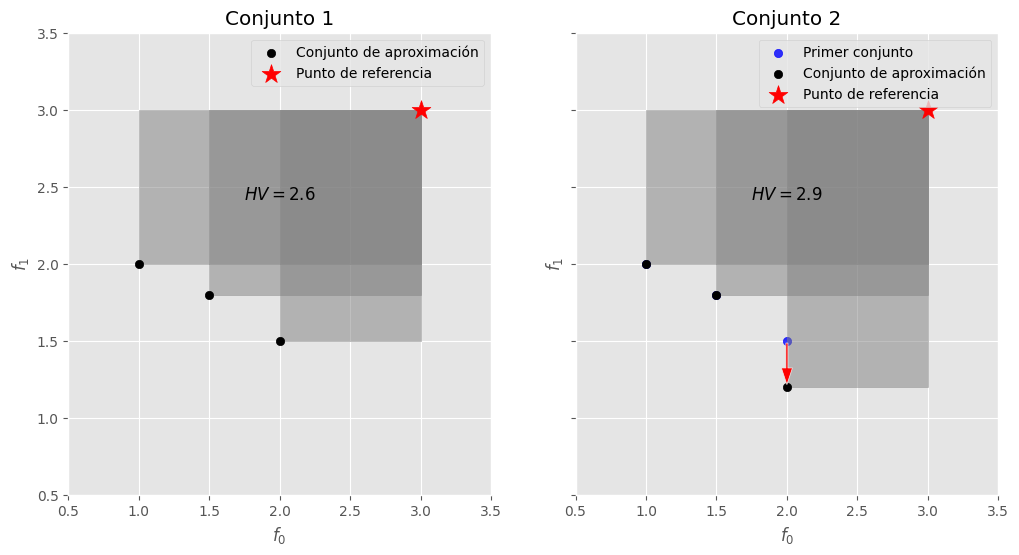

In [ ]:
data = np.array([
    [1, 2],
    [2, 1.5],
    [1.5, 1.8]
])

data_modified = data.copy()
data_modified[1, 1] -= 0.3

ref_point = np.array([3, 3])

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)


def plot_data(ax, data, title):
    hv = HV(ref_point=ref_point)

    for point in data:
        ax.fill_betweenx([point[1], ref_point[1]], point[0], ref_point[0], color='grey', alpha=0.5)


    hypervolume_result = hv.do(data)
    ax.annotate(f'$HV= {round(hypervolume_result,2)}$', xy=(0.5, 0.65), xycoords='axes fraction', fontsize=12, ha='center', va='center')
    ax.scatter(data[:, 0], data[:, 1], color='black', label='Conjunto de aproximación')
    ax.scatter(ref_point[0], ref_point[1], color='red', label='Punto de referencia',marker='*',s=200)
    ax.set_title(title)
    ax.set_xlabel("$f_0$")
    ax.set_ylabel("$f_1$")
    ax.set_xlim(0.5, ref_point[0] + .5)
    ax.set_ylim(0.5, ref_point[1] + .5)
    ax.grid(True)
    ax.legend()

plot_data(ax[0], data, "Conjunto 1")

ax[1].scatter(data[:, 0], data[:, 1], color='blue', label='Primer conjunto',alpha=0.8)
plot_data(ax[1], data_modified, "Conjunto 2")

ax[1].annotate('', xy=(data_modified[1, 0], data_modified[1, 1]), xytext=(data[1, 0], data[1, 1]),
               arrowprops=dict(facecolor='red', shrink=0.05, width=1.5, headwidth=8))

plt.savefig('../Tesis_Latex_LCD/Figuras/HV_demo.pdf')
plt.show()


# Figura de GD, IGD e IGD +

In [ ]:
import numpy as np
from pymoo.problems import get_problem
from pymoo.indicators.igd import IGD
from pymoo.indicators.gd import GD
from pymoo.visualization.scatter import Scatter

# The pareto front of a scaled zdt1 problem
pf = get_problem("zdt1").pareto_front()
punto_medio = pf[len(pf)//2]
# The result found by an algorithm
B= pf [len(pf)//2-5:len(pf)//2+5]*1.1
b_l =len(B)
B = B[1:-1]
A = pf[::len(pf)//len(B)] * 1.15
A=A[1:-1]

# plot the result
pf=np.r_[pf[:len(pf)//2-5], pf[len(pf)//2+10:]]
pf = np.r_[pf,punto_medio.reshape(1,2)]
plt.scatter(pf[:, 0], pf[:, 1], label='Frente de Pareto',s=10)
plt.scatter(A[:,0],A[:,1],label='conjunto A',s=20)
plt.scatter(B[:,0],B[:,1],label='conjunto B',s=20,alpha=0.7)



gd = GD(pf)
igd = IGD(pf)
print(gd(A), gd(B), gd(A)>gd(B))
print(igd(A), igd(B), igd(A)>igd(B))
plt.legend()

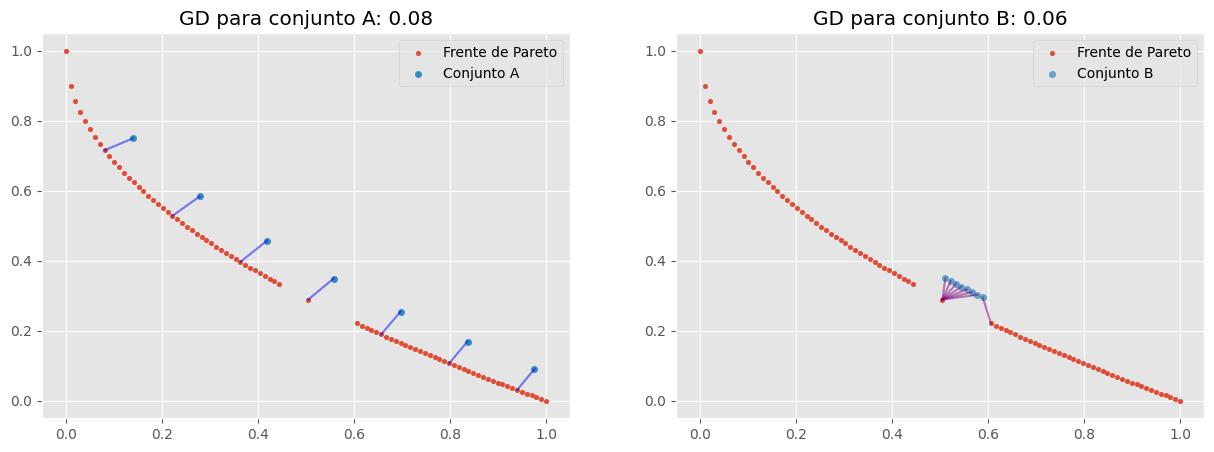

GD for A: 0.07531161381163984
GD for B: 0.062048681552407045
GD Comparison (A > B): True
IGD for A: 0.0952365342034496
IGD for B: 0.3238749069020097
IGD Comparison (A > B): False


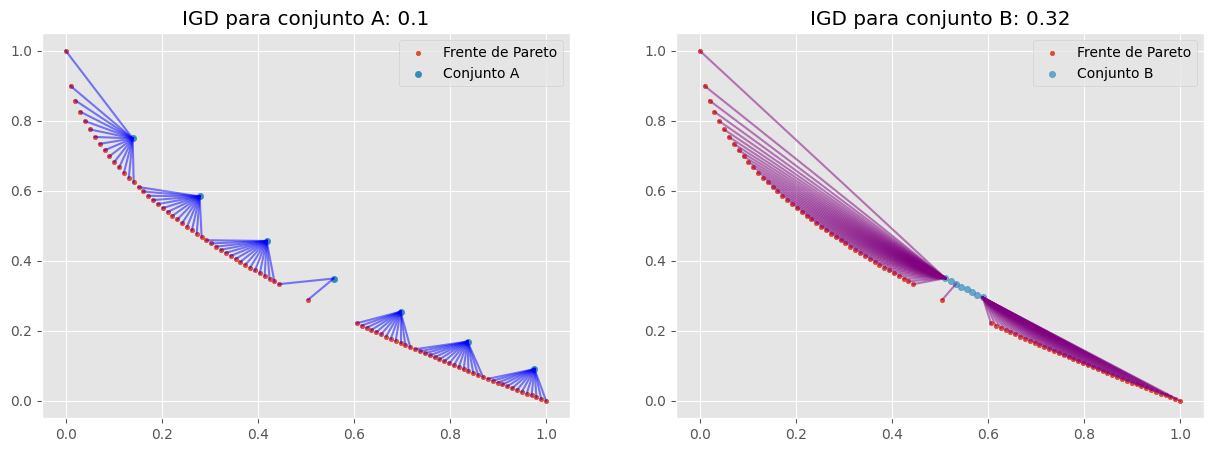

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pymoo.problems import get_problem
from pymoo.indicators.igd import IGD
from pymoo.indicators.gd import GD
from scipy.spatial import distance

plt.style.use('ggplot')

pf = get_problem("zdt1").pareto_front()
punto_medio = pf[len(pf)//2]

B = pf[len(pf)//2-5:len(pf)//2+5] * 1.1
b_l = len(B)
B = B[1:-1]
A = pf[::len(pf)//len(B)] * 1.15
A = A[1:-1]

pf = np.r_[pf[:len(pf)//2-5], pf[len(pf)//2+10:]]
pf = np.r_[pf, punto_medio.reshape(1, 2)]




def draw_lines_approx_to_pf(approx_set, pareto_front,color_line,ax):
    for point in approx_set:
        closest_point = pareto_front[distance.cdist([point], pareto_front).argmin()]
        ax.plot([point[0], closest_point[0]], [point[1], closest_point[1]], alpha=0.5, c=color_line)

def draw_lines_pf_to_approx(pareto_front, approx_set,color_line,ax):
    for point in pareto_front:
        closest_point = approx_set[distance.cdist([point], approx_set).argmin()]
        ax.plot([point[0], closest_point[0]], [point[1], closest_point[1]],alpha= 0.5,c=color_line)


gd = GD(pf)
igd = IGD(pf)
gd_A, gd_B = gd(A), gd(B)
igd_A, igd_B = igd(A), igd(B)

fig, ax= plt.subplots(nrows=1,ncols=2,figsize=(15, 5))

ax[0].scatter(pf[:, 0], pf[:, 1], label='Frente de Pareto', s=10)
ax[0].scatter(A[:, 0], A[:, 1], label='Conjunto A', s=20)
draw_lines_approx_to_pf(A, pf,color_line='blue',ax=ax[0])
ax[0].set_title(f"GD para conjunto A: {round(gd_A,2)}")
ax[0].legend()

ax[1].scatter(pf[:, 0], pf[:, 1], label='Frente de Pareto', s=10)
ax[1].scatter(B[:, 0], B[:, 1], label='Conjunto B', s=20, alpha=0.7)
draw_lines_approx_to_pf(B, pf,color_line='purple',ax=ax[1])
ax[1].set_title(f"GD para conjunto B: {round(gd_B,2)}")

ax[1].legend()
plt.savefig('../Tesis_Latex_LCD/Figuras/GD_demo.pdf')
plt.show()

fig, ax= plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
# IGD
ax[0].scatter(pf[:, 0], pf[:, 1], label='Frente de Pareto', s=10)
ax[0].scatter(A[:, 0], A[:, 1], label='Conjunto A', s=20)
draw_lines_pf_to_approx(pf, A,color_line='blue',ax=ax[0])
ax[0].set_title(f"IGD para conjunto A: {round(igd_A,2)}")
ax[0].legend()

ax[1].scatter(pf[:, 0], pf[:, 1], label='Frente de Pareto', s=10)
ax[1].scatter(B[:, 0], B[:, 1], label='Conjunto B', s=20, alpha=0.7)
draw_lines_pf_to_approx(pf, B,color_line='purple',ax=ax[1])
ax[1].set_title(f"IGD para conjunto B: {round(igd_B,2)}")
ax[1].legend()


print("GD for A:", gd_A)
print("GD for B:", gd_B)
print("GD Comparison (A > B):", gd_A > gd_B)

print("IGD for A:", igd_A)
print("IGD for B:", igd_B)
print("IGD Comparison (A > B):", igd_A > igd_B)

plt.legend()
plt.savefig('../Tesis_Latex_LCD/Figuras/IGD_demo.pdf')
plt.show()


# Figura de R2

In [71]:
problem = get_problem(f"WFG1",n_var=24,n_obj=2)
pf = problem.pareto_front()

In [164]:
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter

utopian = pf.min(axis=0) -0.05

pob_0 = lista_poblaciones[0]
pob_1 = lista_poblaciones[1_000]
pob_2 = lista_poblaciones[2_000]


ref_dirs = get_reference_directions("energy", 2, 5, seed=1)

def tchebyshev(vecs,ref_vec, weights):
    return np.max(np.max(np.abs(vecs - ref_vec) * weights,axis=1))

def plot_line_w_weights(weight,ref_point,scale=1,label=None):
    t = np.linspace(0,scale,100)
    v =ref_point +t[:,None] *weight
    if label is None:
        plt.plot(v[:,0], v[:,1],c='k',linestyle='dashed',alpha=0.5)
    else:
        plt.plot(v[:, 0], v[:, 1], c='k', linestyle='dashed', label=label,alpha=0.5)


def R2(conjunto, ref_vector, weights):
    suma=0
    for weight in weights:
        suma+=tchebyshev(conjunto, ref_vector, weight)
    return suma /len(weights) 

R2_pob_0 = R2(pob_0, utopian, ref_dirs)
R2_pob_1 = R2(pob_1, utopian, ref_dirs)
R2_pob_2 = R2(pob_2, utopian, ref_dirs)


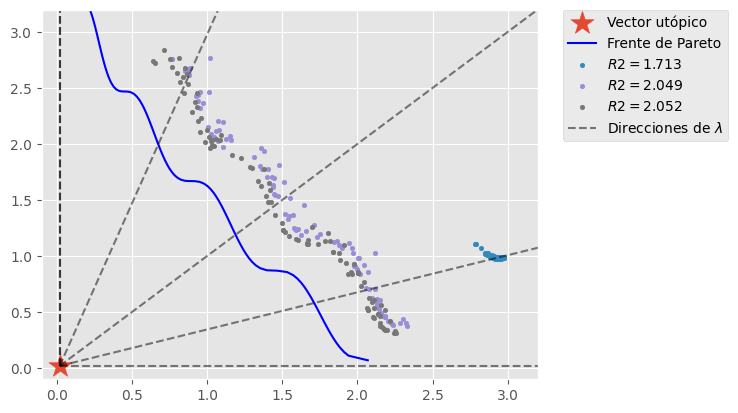

In [172]:

plt.scatter(utopian[0], utopian[1], label='Vector utópico',marker='*',s=300)
plt.plot(pf[:,0], pf[:,1], color='blue', label='Frente de Pareto')
plt.scatter(pob_0[:,0], pob_0[:,1],  label=f'$R2 ={round(R2_pob_0,3)}$',s=10)
plt.scatter(pob_1[:,0], pob_1[:,1],  label=f'$R2 ={round(R2_pob_1,3)}$',s=10)
plt.scatter(pob_2[:,0], pob_2[:,1],  label=f'$R2 ={round(R2_pob_2,3)}$',s=10)

plt.xlim(-.1,3.2)
plt.ylim(-.1,3.2)
for i,ref in enumerate(ref_dirs):
    if i==0:
        plot_line_w_weights(ref, utopian, scale=10,label='Direcciones de $\lambda$')
    plot_line_w_weights(ref, utopian,scale=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
plt.savefig('./Figuras/R2_demo.pdf')

In [131]:
pd.read_csv('../Tesis-LCD/tablas_generadas/QI_carac.csv')

,indicador,Categoría,Meta
0,igd+,Convergencia,Minimize
1,r2,Convergencia,Maximize
2,s-energy,Diversidad,Minimize
3,eps+,Convergencia,Minimize
4,igd,Convergencia,Minimize
5,spd,Diversidad,Maximize
6,hv,Convergencia,Maximize


(12.046599059440464, 12.061958687114533, 10.365218243350188)

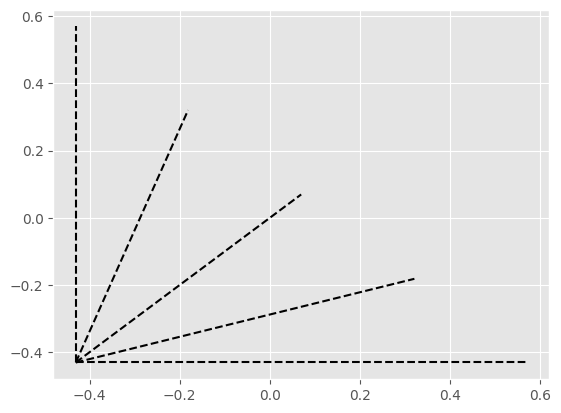

# Figura de Epsilon+

In [ ]:
import numpy as np
def eps_plus(A,B):
    '''La cantidad mínima que se tiene que recorrer A de modo que no esté débilmente dominado por otro conjunto B. Es decir, para que ningún punto en B domine a todos los puntos en A'''
    for bi in B:

        for ai in A:
            np.max(bi-ai)


def gen_puntos_circulo(radio =1, centro =np.array([0,0]), n_puntos = 1_000):
    A = []

    while len(A)<n_puntos:
        u = np.random.random(size=2)*2-1
        if np.linalg.norm(u) < 1:
            A.append(u)

    A = np.array(A)*radio+centro
    return A

In [ ]:
import numpy as np
def epsilon_plus(A,B):
    '''Distancia mínima que tengo que recorrer A para que domine débilmente a B. Es decir, que para todo b in B existe a in B tal que a <= b'''
    min_max_dist = []

    for bi in B:
        max_dist_coord = []
        for ai in A:
            coord_dist_max = np.argmax(ai - bi)
            dist_max = (ai-bi)[coord_dist_max]

            max_dist_coord.append(dist_max)


        min_max_dist.append(np.min(max_dist_coord))
    epsp=max(min_max_dist)
    return epsp

ε_plus = epsilon_plus(A,pf)

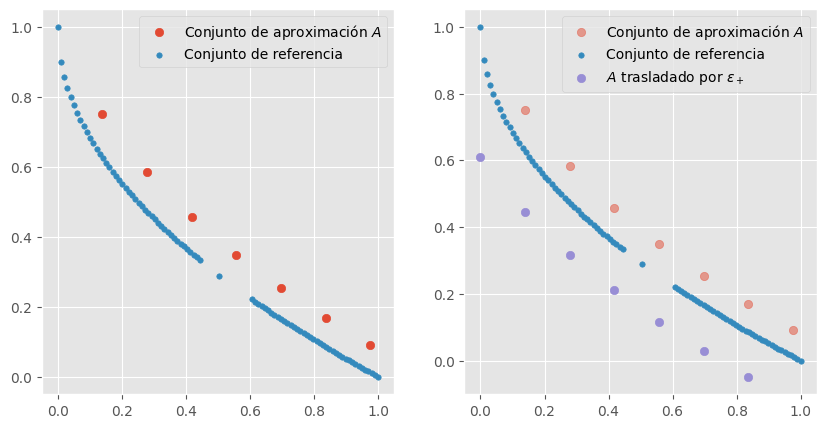

In [ ]:
A_recorrido = A-ε_plus

import seaborn as sns

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
ax[0].scatter(A[:,0],A[:,1], label='Conjunto de aproximación $A$')
ax[0].scatter(pf[:,0],pf[:,1], label = 'Conjunto de referencia', s=15)
ax[0].legend()


ax[1].scatter(A[:,0],A[:,1], label='Conjunto de aproximación $A$',alpha=0.5)
ax[1].scatter(pf[:,0],pf[:,1], label = 'Conjunto de referencia', s=15)
ax[1].scatter(A_recorrido[:,0],A_recorrido[:,1],label= '$A$ trasladado por $epsilon_+$')
ax[1].legend()

plt.savefig('../Tesis_Latex_LCD/Figuras/epsilon_plus_demo.pdf')

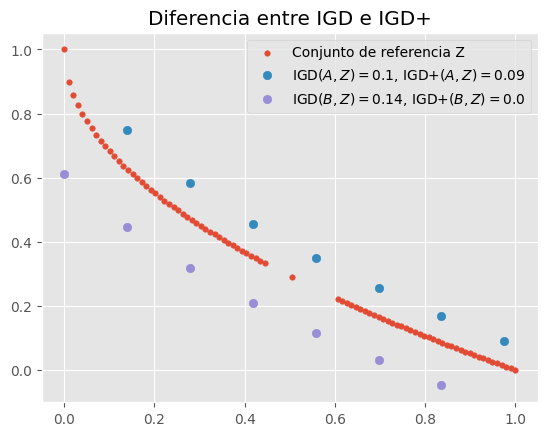

In [ ]:
from pymoo.indicators.igd import IGD
from pymoo.indicators.igd_plus import IGDPlus

igd = IGD(pf)
igdp  =IGDPlus(pf)
A_recorrido = A-ε_plus
igd(A), igdp(A), igd(A_recorrido), igdp(A_recorrido)

plt.title('Diferencia entre IGD e IGD+')
plt.scatter(pf[:,0],pf[:,1], label = 'Conjunto de referencia Z', s=15)
plt.scatter(A[:,0],A[:,1], label=f'IGD$(A,Z)={round(igd(A),2)}$, IGD+$(A,Z)={round(igdp(A),2)}$' ,alpha=1)
plt.scatter(A_recorrido[:,0],A_recorrido[:,1], label=f'IGD$(B,Z)={round(igd(A_recorrido),2)}$, IGD+$(B,Z)={round(igdp(A_recorrido),2)}$',alpha=1)
# plt.scatter(A_recorrido[:,0],A_recorrido[:,1],label= '$IGD+(A,B)=0$')
plt.legend()
plt.savefig('../Tesis_Latex_LCD/Figuras/igdp_demo.pdf')

# SPD

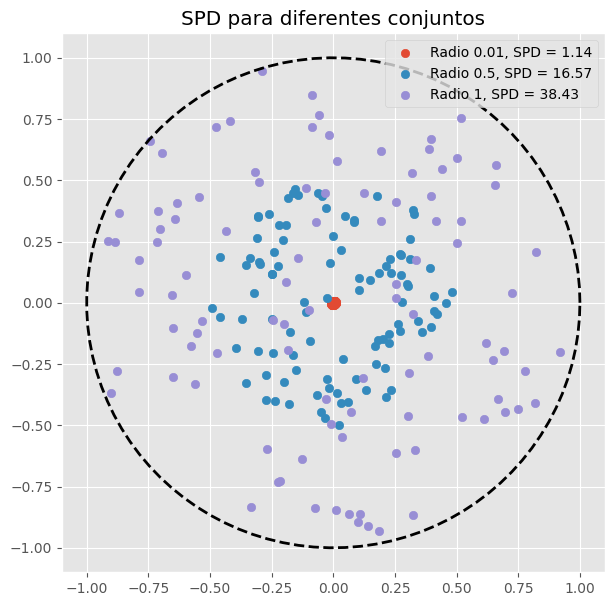

In [ ]:
import numpy as np

def compute_distance_matrix(points, theta=10):
    """Compute the matrix M for the SPI based on distances."""
    n = len(points)
    M = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            M[i, j] = np.exp(-theta * np.linalg.norm(points[i] - points[j]))
    return M

def solow_polasky_indicator(points, theta=10):
    """Compute the Solow Polasky Indicator."""
    M = compute_distance_matrix(points, theta)
    C = np.linalg.inv(M)
    return np.sum(C)

circ_pequeño = gen_puntos_circulo(radio= 0.01, n_puntos=100)
circ_mediano = gen_puntos_circulo(radio= 0.5, n_puntos=100)
circ_grande = gen_puntos_circulo(radio= 1, n_puntos=100)

spd_pequeño = solow_polasky_indicator(circ_pequeño)
spd_mediano = solow_polasky_indicator(circ_mediano)
spd_grande = solow_polasky_indicator(circ_grande)

plt.figure(figsize=(7, 7))
plt.title('SPD para diferentes conjuntos')
plt.scatter(circ_pequeño[:,0], circ_pequeño[:,1], label=f'Radio 0.01, SPD = {round(spd_pequeño,2)}')
plt.scatter(circ_mediano[:, 0], circ_mediano[:, 1], label=f'Radio 0.5, SPD = {round(spd_mediano,2)}')
plt.scatter(circ_grande[:, 0], circ_grande[:, 1],label=f'Radio 1, SPD = {round(spd_grande,2)}')
# add a unit circle to the plot with a shaded area in its interior
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(t), np.sin(t), 'k--', linewidth=2)#,label='Circulo Unitario')


plt.legend()
plt.savefig('../Tesis_Latex_LCD/Figuras/SPD_demo.pdf')
plt.show()

# S-energy

In [188]:
puntos_normal

array([[-3.93033046e-01, -2.48961587e-01,  3.00781093e+00,
         2.74613147e+00,  4.68962528e-01,  6.03417129e+00,
        -1.53867017e-01, -1.17327110e+00,  3.07865589e+00,
         1.45044007e+00,  1.44464837e+00, -3.77466009e+00,
         1.60827675e+00, -5.21181041e-01, -2.05604928e+00,
         3.51572724e+00, -1.10046458e+00,  2.17100491e+00,
         2.76947470e+00,  1.07184104e+00, -1.70562786e+00,
         1.51916216e+00, -1.28494949e-01, -3.82410280e+00,
        -3.30102162e+00, -1.23226496e-02,  6.17150395e-01,
         1.25615046e+00,  4.74264465e-01,  1.75199176e+00,
        -1.36864277e+00,  2.70087865e-01,  7.48787865e-01,
        -7.45877458e-01,  4.34402590e+00,  1.07200597e+00,
         1.09850374e+00, -4.35504339e+00,  2.71394558e+00,
        -4.59652229e+00, -2.55516481e+00,  1.64939784e+00,
         1.39397686e+00,  1.14189809e-02,  1.33513196e+00,
         4.44488940e-02, -6.40943595e-01,  2.56007479e+00,
         1.22062297e+00,  3.58462129e+00, -1.27989139e+0

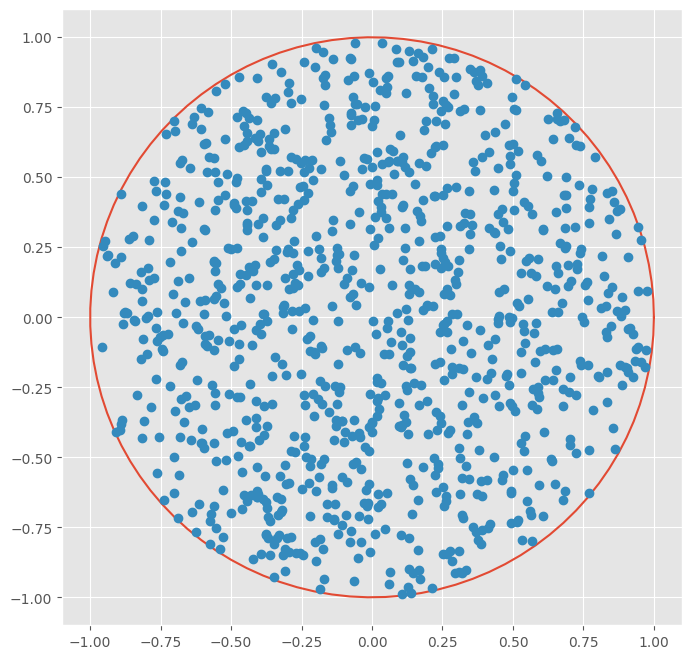

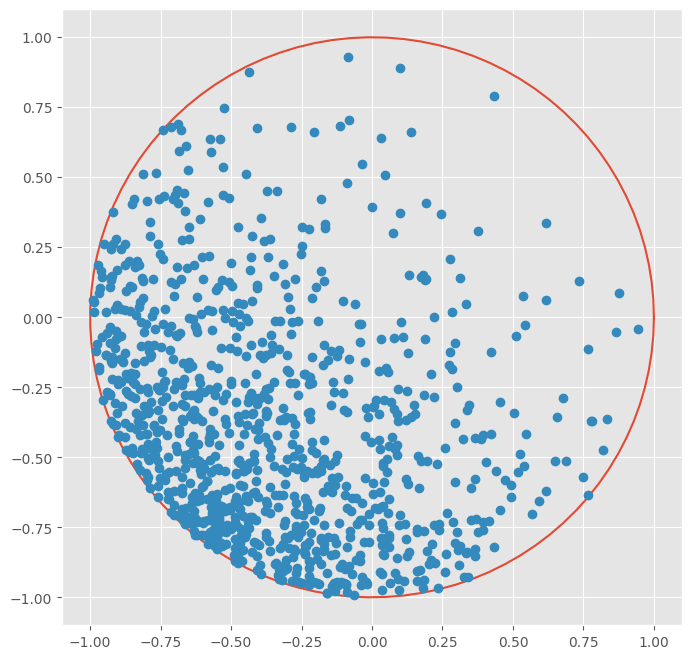

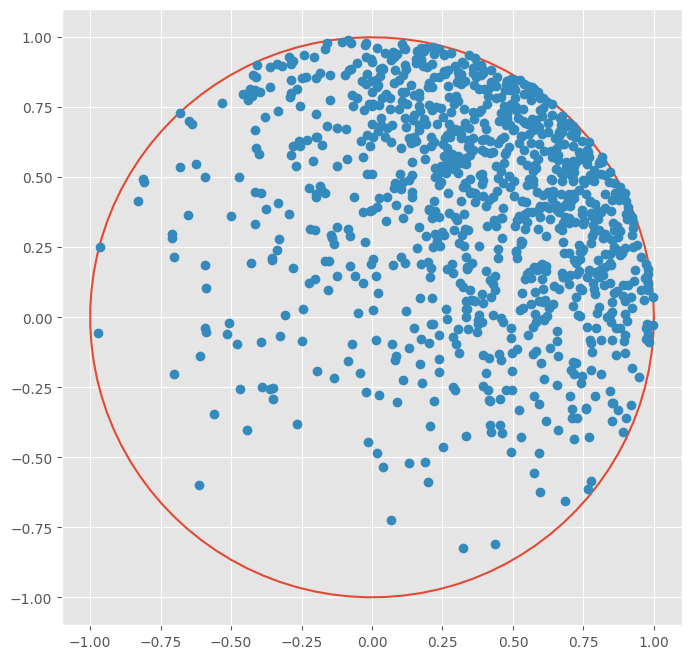

In [211]:
def generate_points_in_circle(num_points, radius=1, skew='uniform'):
    """
    Generates points within a circle with a higher probability of being on the right, left,
    or uniformly distributed.
    
    Parameters:
    - num_points: int, number of points to generate.
    - radius: float, radius of the circle.
    - skew: str, type of skewness ('uniform', 'right', 'left').
    
    Returns:
    - points: numpy array of shape (num_points, 2), the generated points.
    """

    n=0
    puntos =np.zeros((num_points, 2))
    while n < num_points:
        if skew=='uniform':
            puntos_normal =np.random.normal(loc=0,scale=1,size=2)

        elif skew=='right':
            puntos_normal =np.random.normal(loc=2,scale=1,size=2)
        else:
            puntos_normal =np.random.normal(loc=-2,scale=1,size=2)
        if np.linalg.norm(puntos_normal) > radius:
            continue

        puntos[n]=puntos_normal
        n+=1

    
    return puntos
puntos = generate_points_in_circle(1000)
puntos_left = generate_points_in_circle(1000,skew='left')
puntos_right = generate_points_in_circle(1000,skew='right')
# draw a circle 
theta = np.linspace(0, 2*np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)
plt.figure(figsize=(8, 8))
plt.plot(x, y)
plt.plot(puntos[:,0], puntos[:,1], 'o')

# draw a circle 
theta = np.linspace(0, 2*np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)
plt.figure(figsize=(8, 8))
plt.plot(x, y)
plt.plot(puntos_left[:,0], puntos_left[:,1], 'o')

# draw a circle 
theta = np.linspace(0, 2*np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)
plt.figure(figsize=(8, 8))
plt.plot(x, y)
plt.plot(puntos_right[:,0], puntos_right[:,1], 'o')

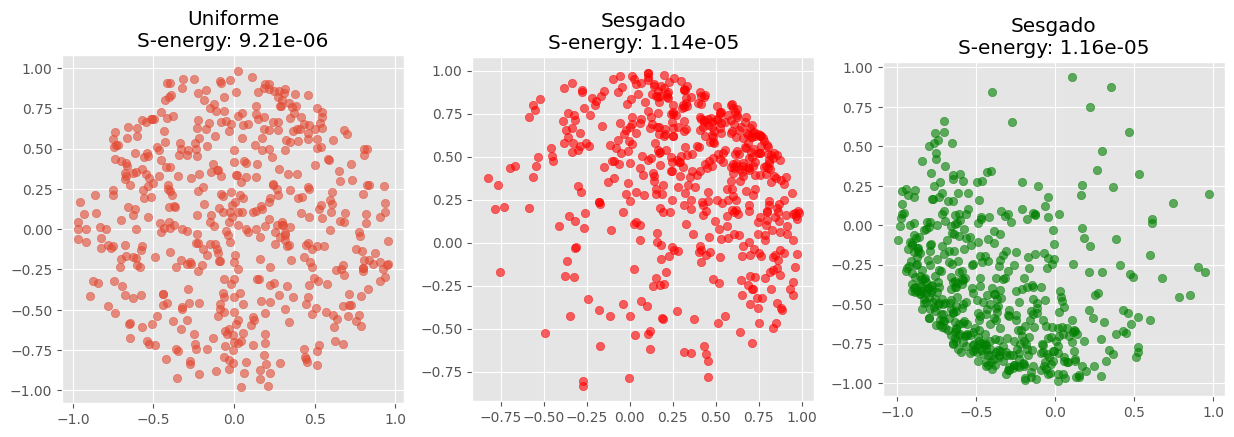

In [221]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist



def compute_s_energy(points):
    """
    Computes the S-energy of a set of points.
    
    Parameters:
    - points: numpy array of shape (num_points, 2), the points for which to compute the S-energy.
    
    Returns:
    - s_energy: float, the computed S-energy.
    """
    distances = pdist(points)
    s_energy = 1/np.sum(distances) 
    return s_energy

# Example usage
num_points = 500
points_uniform = generate_points_in_circle(num_points, radius=1, skew='uniform')
points_right = generate_points_in_circle(num_points, radius=1, skew='right')
points_left = generate_points_in_circle(num_points, radius=1, skew='left')

# Compute S-energy for each set of points
s_energy_uniform = compute_s_energy(points_uniform)
s_energy_right = compute_s_energy(points_right)
s_energy_left = compute_s_energy(points_left)

# Plot the points and display S-energy
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(points_uniform[:, 0], points_uniform[:, 1], alpha=0.6)
plt.title(f'Uniforme\nS-energy: {s_energy_uniform:.2e}')
plt.gca().set_aspect('equal', adjustable='box')

plt.subplot(1, 3, 2)
plt.scatter(points_right[:, 0], points_right[:, 1], alpha=0.6, color='r')
plt.title(f'Sesgado\nS-energy: {s_energy_right:.2e}')
plt.gca().set_aspect('equal', adjustable='box')

plt.subplot(1, 3, 3)
plt.scatter(points_left[:, 0], points_left[:, 1], alpha=0.6, color='g')
plt.title(f'Sesgado\nS-energy: {s_energy_left:.2e}')
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('./Figuras/senergy_demo.pdf')
plt.show()


Función de Tchebyshev

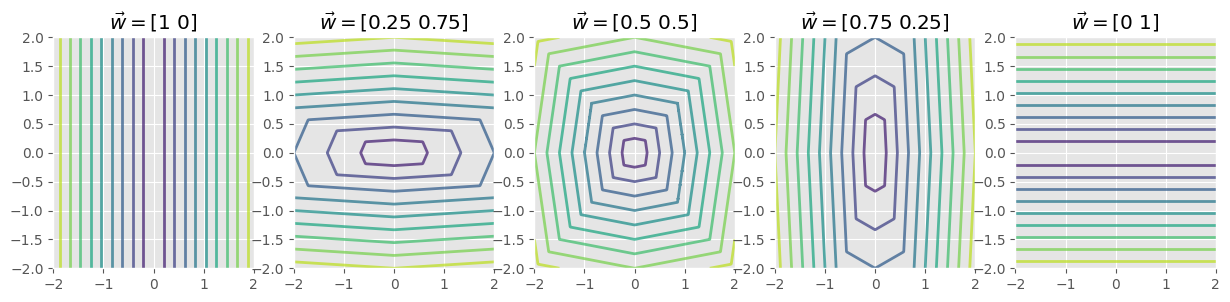

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def augmented_tchebyshev(x, y, ref_point, weights, rho=0.1):
    """
    Augmented Tchebyshev function.
    
    Parameters:
    - x, y: Coordinates of the points.
    - ref_point: Reference point (z*).
    - weights: Weights for the objectives.
    - rho: Small positive scalar to augment the function.
    
    Returns:
    - Augmented Tchebyshev value.
    """
    f1 = np.abs(x - ref_point[0])
    f2 = np.abs(y - ref_point[1])
    
    tchebyshev = np.maximum(weights[0] * f1, weights[1] * f2)
    augmentation = rho * (weights[0] * f1 + weights[1] * f2)
    
    return tchebyshev + augmentation

# Define the reference point
ref_point = np.array([0, 0])

# Create a grid of points
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

# Different sets of weights
weights_list = [
    np.array([1, 0]),
    np.array([0.25, .75]),
    np.array([0.5, .5]),
    np.array([.75, 0.25]),
    np.array([0, 1]),
]

# Plot the isometric (contour) lines for different weights
fig,axs = plt.subplots(nrows=1,ncols=5, figsize=(15, 3))

# plt.suptitle('$\\alpha=0.01$')
for i,weight in enumerate(weights_list):
    Z = augmented_tchebyshev(X, Y, ref_point, weight,rho=0.2)
    
    axs[i].contour(X, Y, Z, levels=10, linewidths=2, alpha=0.75)
    axs[i].set_title("$\\vec{w}=$"+ str(weight))

# # Add labels and title
# plt.title("Isométricas de la función ATCH para $\\vec{w}=(\\frac{1}{4},\\frac{3}{4})$")
# plt.xlabel("x")
# plt.ylabel("y")
# plt.legend()
# # Show the plot
# plt.show()


$\alpha=0.01$

$\alpha=0.2$

# Punto, ideal y de Nadir

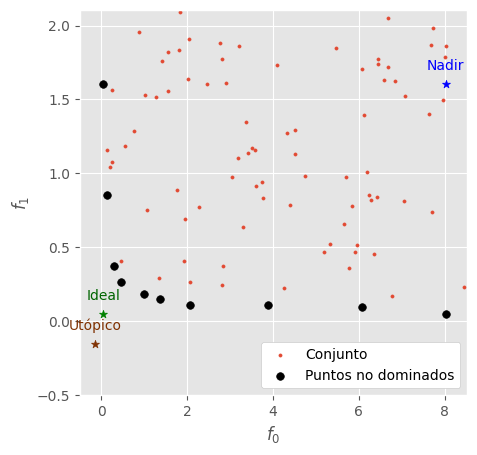

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_non_dominated_set(points):
    """
    Computes the non-dominated set from a 2D set of points, and finds the nadir and ideal points.

    Args:
    - points (np.array): An array of shape (n, 2) where n is the number of points.

    Returns:
    - non_dominated (list of tuple): The non-dominated points.
    - ideal_point (tuple): The ideal point (min(min(x), min(y))).
    - nadir_point (tuple): The nadir point (max(max(x), max(y))).
    """
    points = np.array(points)
    non_dominated = []

    for i, p in enumerate(points):
        dominated = False
        for j, q in enumerate(points):
            if i != j and all(q <= p) and any(q < p):
                dominated = True
                break
        if not dominated:
            non_dominated.append(tuple(p))

    # Calculate ideal and nadir points
    non_dominated_array = np.array(non_dominated)
    ideal_point = (np.min(non_dominated_array[:, 0]), np.min(non_dominated_array[:, 1]))
    nadir_point = (np.max(non_dominated_array[:, 0]), np.max(non_dominated_array[:, 1]))

    return non_dominated, ideal_point, nadir_point

# Simulate a set of points
np.random.seed(42)  # For reproducibility
num_points = 500
points = np.random.rand(num_points, 2) * 10  # Scale points to [0, 10]

# Compute non-dominated set, ideal point, and nadir point
non_dominated, ideal_point, nadir_point = compute_non_dominated_set(points)

# Plotting
points_array = np.array(points)
non_dominated_array = np.array(non_dominated)

plt.figure(figsize=(5, 5))
plt.scatter(points_array[:, 0], points_array[:, 1], label="Conjunto", s=5)
plt.scatter(non_dominated_array[:, 0], non_dominated_array[:, 1], color='black', label="Puntos no dominados",s=30)
plt.scatter(*ideal_point, color='g',marker='*')#, label="Punto ideal")
plt.scatter(*nadir_point, color='b',marker='*')#, label="Punto de Nadir")
plt.scatter(ideal_point[0]-0.2, ideal_point[1]-0.2, color='#803203',marker='*')#, label="Punto Ideal")
import seaborn as sns

colores = sns.color_palette()



# for point in non_dominated:
#     plt.annotate("ND", (point[0], point[1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.annotate("Ideal", (ideal_point[0], ideal_point[1]), textcoords="offset points", xytext=(0,10), ha='center', color='darkgreen')
plt.annotate("Utópico", (ideal_point[0]-0.2, ideal_point[1]-0.2), textcoords="offset points", xytext=(0,10), ha='center', color='#803203')
plt.annotate("Nadir", (nadir_point[0], nadir_point[1]), textcoords="offset points", xytext=(0,10), ha='center', color='b')

plt.xlabel("$f_0$")
plt.ylabel("$f_1$")
plt.xlim(-0.5,nadir_point[0]+.5)
plt.ylim(-0.5,nadir_point[1]+.5)
plt.legend(fancybox=True, framealpha=1, facecolor='white')

plt.grid(True)
plt.savefig('../Tesis_Latex_LCD/Figuras/nadir_utopico_ideal.pdf')
plt.show()


# Casos selección PFI-EMOA

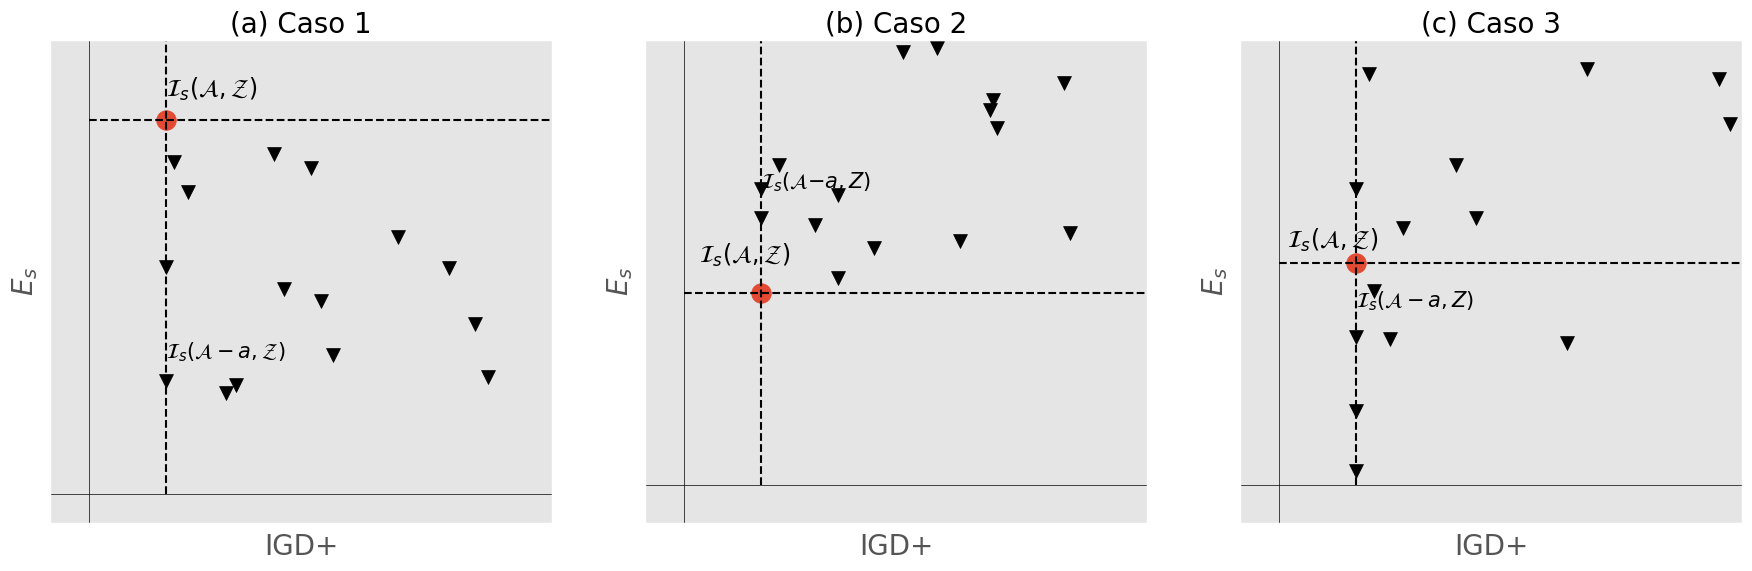

In [82]:
import matplotlib.pyplot as plt
import numpy as np

def plot_scenarios():
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Common setup for all plots
    def setup_plot(ax, title):
        ax.set_title(title,fontsize=20)
        ax.set_xlabel('IGD+',fontsize=20)
        ax.set_ylabel('$E_s$',fontsize=20)
        ax.grid(True)
        ax.axhline(0, color='black',linewidth=0.5)
        ax.axvline(0, color='black',linewidth=0.5)
        ax.set_xlim(-1, 6)
        ax.set_ylim(-1, 6)
    np.random.seed(42)
    # Caso 1
    ax = axes[0]
    setup_plot(ax, '(a) Caso 1')
    ax.scatter(x=[0.5], y=[3.3],s=200)  # Es(A), IGD+(\\mathcal{A}, \\mathcal{Z})
    ax.hlines(y=3.3,xmin=0,xmax=4,colors='k',linestyle='dashed')
    ax.vlines(x=0.5,ymin=0,ymax=4,colors='k',linestyle='dashed')
    ax.text(0.5, 3.5, '$\\mathcal{I}_s(\\mathcal{A}, \\mathcal{Z})$', fontsize=17)
    points = np.array([[0.5, 1], [0.5, 2], [1.2, 3], [1.5,1.7], [2.5,1.5]])
    puntos_random = np.random.uniform(0.5,3,size=(10,2))
    points= np.concatenate((points, puntos_random), axis=0)
    ax.scatter(points[:, 0], points[:, 1], marker='v', color='black',s=100)
    for i, point in enumerate(points):
        if i==0:
            ax.text(point[0], point[1]+0.2, '$\\mathcal{I}_s(\\mathcal{A} - {a}, \\mathcal{Z})$', fontsize=15)
    ax.set_ylim(-0.25,4)
    ax.set_xlim(-0.25,3)

    # Caso 2
    ax = axes[1]
    setup_plot(ax, '(b) Caso 2')
    ax.scatter(x=[0.5], y=[1.3], s=200)  # Es(A), IGD+(\\mathcal{A}, \\mathcal{Z})
    ax.hlines(y=1.3,xmin=0,xmax=4,colors='k',linestyle='dashed')
    ax.vlines(x=0.5,ymin=0,ymax=4,colors='k',linestyle='dashed')
    ax.text(0.1, 1.5, '$\\mathcal{I}_s(\\mathcal{A}, \\mathcal{Z})$', fontsize=17)
    points = np.array([[.5, 1.8], [.5, 2], [1, 1.4], [2, 2.6], [2.5,1.7]]) 
    puntos_random_x = np.random.uniform(0.5,3,size=10)
    puntos_random_y =   np.random.uniform(1.5,3,size=10)
    puntos_random = np.column_stack((puntos_random_x, puntos_random_y))
    
    points= np.concatenate((points, puntos_random), axis=0)
    ax.scatter(points[:, 0], points[:, 1], marker='v', color='black',s=100)
    for i, point in enumerate(points):
        if i==0:
            ax.text(point[0], point[1]+0.2, '$\\mathcal{I}_s(\mathcal{A} \\minus {a}, Z)$', fontsize=15)
    ax.set_ylim(-0.25,3)
    ax.set_xlim(-0.25,3)

    # Caso 3
    ax = axes[2]
    setup_plot(ax, '(c) Caso 3')
    ax.scatter(x=[0.5], y=[1.5], s=200)  # Es(A), IGD+(\\mathcal{A}, \\mathcal{Z})
    ax.text(0.05, 1.6, '$\\mathcal{I}_s(\\mathcal{A}, \\mathcal{Z})$', fontsize=17)
    ax.hlines(y=1.5,xmin=0,xmax=4,colors='k',linestyle='dashed')
    ax.vlines(x=0.5,ymin=0,ymax=4,colors='k',linestyle='dashed')
    points = np.array([[0.5, 1], [0.5, 2], [0.5, .5], [0.5, .1]])
    puntos_random = np.random.uniform(.5,3,size=(10,2))
    points = np.concatenate((points, puntos_random), axis=0)
    ax.scatter(points[:, 0], points[:, 1], marker='v', color='black',s=100)
    for i, point in enumerate(points):
        if i==0:
            ax.text(point[0], point[1]+0.2, '$\\mathcal{I}_s(\mathcal{A} - {a}, Z)$', fontsize=15)

    ax.set_ylim(-0.25,3)
    ax.set_xlim(-0.25,3)
    plt.tight_layout()
    plt.savefig('../Tesis_Latex_LCD/Figuras/casos.pdf')
    # remove axis ticks
    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
        #put arrows on axis lines
plt.style.use('ggplot')
plot_scenarios()

$\setminus \setminus $

# Algoritmo genético que calcula operadores unarios

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np

# Para mostrar todas las columnas cuando se imprime un df
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [ ]:
class Algoritmo_Genetico():

    def __init__(self, poblacion_iniciales,  funcion_fitness, probabilidad_mutacion=0.01, probabilidad_cruce=0.2, numero_iteraciones=np.inf, condicion_paro = None):

        self.poblacion_iniciales = poblacion_iniciales
        self.probabilidad_mutacion = probabilidad_mutacion
        self.probabilidad_cruce = probabilidad_cruce
        self.numero_iteraciones = numero_iteraciones
        self.condicion_paro = condicion_paro
        self.funcion_fitness = funcion_fitness

        self.poblaciones = [poblacion_iniciales] # Para ir almacenando las poblaciones

    def run_un_paso(self):
        poblacion = self.seleccion(self.poblacion_iniciales)
        poblacion = self.cruce(poblacion)
        poblacion = self.mutacion(poblacion)
        return max(poblacion, key=self.funcion_fitness)

    def ejecutar(self):
        poblacion = self.poblacion_iniciales
        for _ in range(self.numero_iteraciones):
            poblacion = self.seleccion(poblacion)
            poblacion = self.cruce(poblacion)
            poblacion = self.mutacion(poblacion)
        return max(poblacion, key=self.funcion_fitness)

    def seleccion(self, poblacion):
        # Implementar selección por torneo

        # individuos = np.random.choice(poblacion, size=len(poblacion), replace=True)
        idxs = np.random.choice(np.arange(len(poblacion)),size=len(poblacion)*2,replace=True)
        individuos = poblacion[idxs]
        return np.array([max(individuos[i:i+2], key=self.funcion_fitness) for i in range(0, len(individuos), 2)])


    def cruce(self, poblacion):

        parent1 = np.random.choice(poblacion, size=len(poblacion.poblacion), replace=True)
        parent2 = np.random.choice(poblacion, size=len(poblacion.poblacion), replace=True)

        offspring1 = []
        for p1, p2 in zip(parent1, parent2):
            low = min(p1, p2)
            high = max(p1, p2)
            range = high - low
            low = low - alpha * range
            high = high + alpha * range
            offspring1.append(np.random.uniform(low, high))

        return offspring1


    def mutacion(self, poblacion):
        for i, individuo in enumerate(poblacion):
            if np.random.rand() < self.probabilidad_mutacion:
                print(i,'mutado')
                poblacion[i] = gaussiano_cuad_unitario(n_pob=len(poblacion[0]))

        return poblacion

class Poblacion():
    def __init__(self, tamaño, funcion_generacion, funcion_validacion_poblacion=None):
        self.tamaño = tamaño
        self.funcion_generacion = funcion_generacion
        self.funcion_validacion_poblacion = funcion_validacion_poblacion

    def generar(self):
        # Implementar generación de población inicia
        #
        self.poblacion =  self.funcion_generacion(self.tamaño)
        return self.poblacion

    def verificar_poblacion(self):
        # Implementar verificación de población
        return self.funcion_validacion_poblacion(self.poblacion)

class Conjunto_Poblaciones:
    def __init__(self, Poblacion, n_poblaciones, funcion_generacion):
        self.n_poblaciones = n_poblaciones
        self.Poblacion = Poblacion
        self.cjto_poblaciones = None
        self.funcion_generacion = funcion_generacion

    def generar_cjto_poblaciones(self):
        cjto_poblaciones = [self.Poblacion(tamaño=self.n_poblaciones,funcion_generacion= self.funcion_generacion).generar() for _ in range(self.n_poblaciones)]
        self.cjto_poblaciones = np.array(cjto_poblaciones)
        return np.array(cjto_poblaciones)



def gaussiano_cuad_unitario(n_pob):
    poblacion = []
    while len(poblacion) < n_pob:
        individuo = np.random.normal(0, 1,size=2)
        if np.all(individuo >= -1) and np.all(individuo <= 1):
            poblacion.append(individuo)

    return np.array(poblacion)



def compute_distance_matrix(points, theta=10):
    """Compute the matrix M for the SPI based on distances."""
    n = len(points)
    M = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            M[i, j] = np.exp(-theta * np.linalg.norm(points[i] - points[j]))
    return M

def solow_polasky_indicator(points, theta=10):
    """Compute the Solow Polasky Indicator."""
    M = compute_distance_matrix(points, theta)
    C = np.linalg.inv(M)
    return np.sum(C)

# ag = Algoritmo_Genetico(poblacion_iniciales=pob_inicial, probabilidad_mutacion=0.1, probabilidad_cruce=0.9, numero_iteraciones=100, funcion_fitness=solow_polasky_indicator)




cjto_poblaciones = Conjunto_Poblaciones(Poblacion=Poblacion, n_poblaciones=10,funcion_generacion=gaussiano_cuad_unitario)

cjto_poblaciones.generar_cjto_poblaciones()

pob_inicial = cjto_poblaciones.cjto_poblaciones[0]
ag = Algoritmo_Genetico(poblacion_iniciales=cjto_poblaciones.cjto_poblaciones, funcion_fitness= solow_polasky_indicator)
# pob_inicial

In [ ]:
nueva_pob = ag.seleccion(cjto_poblaciones.cjto_poblaciones)

In [ ]:
nueva_pob.shape

(10, 10, 2)

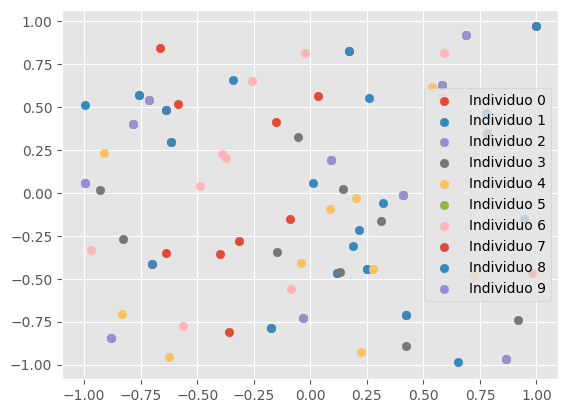

In [ ]:
for i,ind in enumerate(nueva_pob):
    plt.scatter(ind[:,0],ind[:,1],label=f'Individuo {i}')

plt.legend()
plt.show()

In [ ]:
cjto_poblaciones.cjto_poblaciones.shape

(10, 10, 2)